# <font color = 'green'>Phase 2. Exploration of PGA Tour Cleaned Data</font>

## <font color = green><u>Step 1. Read in the dataset and all necessary libraries into the environment</u></font>

In [1]:
"""
Import the necessary libraries and the datsets for exploration of the data
"""

# Import the necessary libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

# Import the cleaned datasets
pga_clean = pd.read_csv('Data_Files/pga_clean.csv')
sg_data = pd.read_csv('Data_Files/sg_data_clean.csv')
pga_clean_valid = pd.read_csv('Data_Files/pga_clean_valid.csv')
sg_data_valid = pd.read_csv('Data_Files/sg_data_valid.csv')

In [2]:
"""
In order to be able to perform time series analysis, change the `date` variable to a datetime data type.
"""

# Change the `date` variable to a datetime dat type
pga_clean['date'] = pd.to_datetime(pga_clean['date'])

# Confirm that the variable was changed to a datetime data type using .info()
pga_clean['date'].info()

'\nIn order to be able to perform time series analysis, change the `date` variable to a datetime data type.\n'

<class 'pandas.core.series.Series'>
RangeIndex: 36864 entries, 0 to 36863
Series name: date
Non-Null Count  Dtype         
--------------  -----         
36864 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 288.1 KB


## <font color = 'green'><u>Step 2. Univariate Analysis</u></font>

### 2.1 Exploration of Categorical Variables:
1. **Frequency distributions**: Create frequency tables to understand the distribution of categories.
2. **Bar Charts**: Use bar charts to see the frequency or counts of each category to help understand the distribution of prevalence of each category.

<u>Categorical Variables to Explore:</u>
- `Player_initial_last` &rarr; Intial of player's first name and their full last name *[string]*
- `player` &rarr; The player's full name 
- `player id` &rarr; A unique ID assigned to each individual player
- `tournament name` &rarr; The name of the tournament
- `tournament id` &rarr; A unique ID assigned to each individual tournament
- `course` &rarr; The name of the course the tournament is being played at
- `season` &rarr; The season that the tournament is being played (distinguished by the year)
- `Finish` &rarr; The position the player finsihed the tournament (including indications of whether the player tied, wishdrew, missed the cut, make the cut but didn't finish, or was disqualified)

#### Create Frequency Distribution for Each of the Categorical Variables

In [3]:
"""
Frequency Distributions of the Categorical Variables
"""

# Define the categorical variables
cat_variables = ['Player_initial_last', 'player', 'player id', 'tournament name', 'tournament id', 'course', 'season', 'Finish']

# Create the frequency distributions for the categorical variables
cat_frequency_distributions = {col: pga_clean[col].value_counts() for col in cat_variables}

# Print the frquency distributions for the categorical variables
for col, freq_dist in cat_frequency_distributions.items():
    print('\n')
    print(freq_dist)

'\nFrequency Distributions of the Categorical Variables\n'



Player_initial_last
B. Stuard        212
D. Lee           209
B. Harman        203
R. Streb         198
N. Taylor        194
                ... 
M. Harmon          1
N. Schietekat      1
P. Ballo           1
W. Liang           1
K. Samooja         1
Name: count, Length: 497, dtype: int64


player
Brian Stuard       212
Danny Lee          209
Brian Harman       203
Robert Streb       198
Nick Taylor        194
                  ... 
Matt Harmon          1
Neil Schietekat      1
Peter Ballo          1
Wen-Chong Liang      1
Kalle Samooja        1
Name: count, Length: 499, dtype: int64


player id
3599       212
3950       209
1225       203
5619       198
3792       194
          ... 
3384         1
5095         1
4845303      1
5209         1
7055         1
Name: count, Length: 499, dtype: int64


tournament name
Farmers Insurance Open                 1121
AT&T Pebble Beach Pro-Am               1099
The Honda Classic                      1061
PGA Championship                       10

#### Create Bar Charts for Specific Categorigical Variables of Interest

**<u> Categorical Variables of Interest for Bar Charts </u>**
- tournament name
- course
- season

'\nCreate bar charts for the categorical variables of interest\n'

<Figure size 2000x1000 with 0 Axes>

<Axes: xlabel='tournament name', ylabel='count'>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79],
 [Text(0, 0, 'Farmers Insurance Open'),
  Text(1, 0, 'AT&T Pebble Beach Pro-Am'),
  Text(2, 0, 'The Honda Classic'),
  Text(3, 0, 'PGA Championship'),
  Text(4, 0, 'Shriners Hospital for Children Open'),
  Text(5, 0, 'RBC Heritage'),
  Text(6, 0, 'Sony Open in Hawaii'),
  Text(7, 0, 'Waste Management Phoenix Open'),
  Text(8, 0, 'The Players Championship'),
  Text(9, 0, 'Wyndham Championship'),
  Text(10, 0, 'Wells Fargo Championship'),
  Text(11, 0, 'The RSM Classic'),
  Text(12, 0, 'AT&T Byron Nelson'),
  Text(13, 0, 'The

Text(0.5, 1.0, 'Frequency Distribution of the Number of Player Entries per Tournaments between 2015 and 2022 Seasons')

Text(0.5, 0, 'Tournament Name')

Text(0, 0.5, 'Frequency of Player Entries')

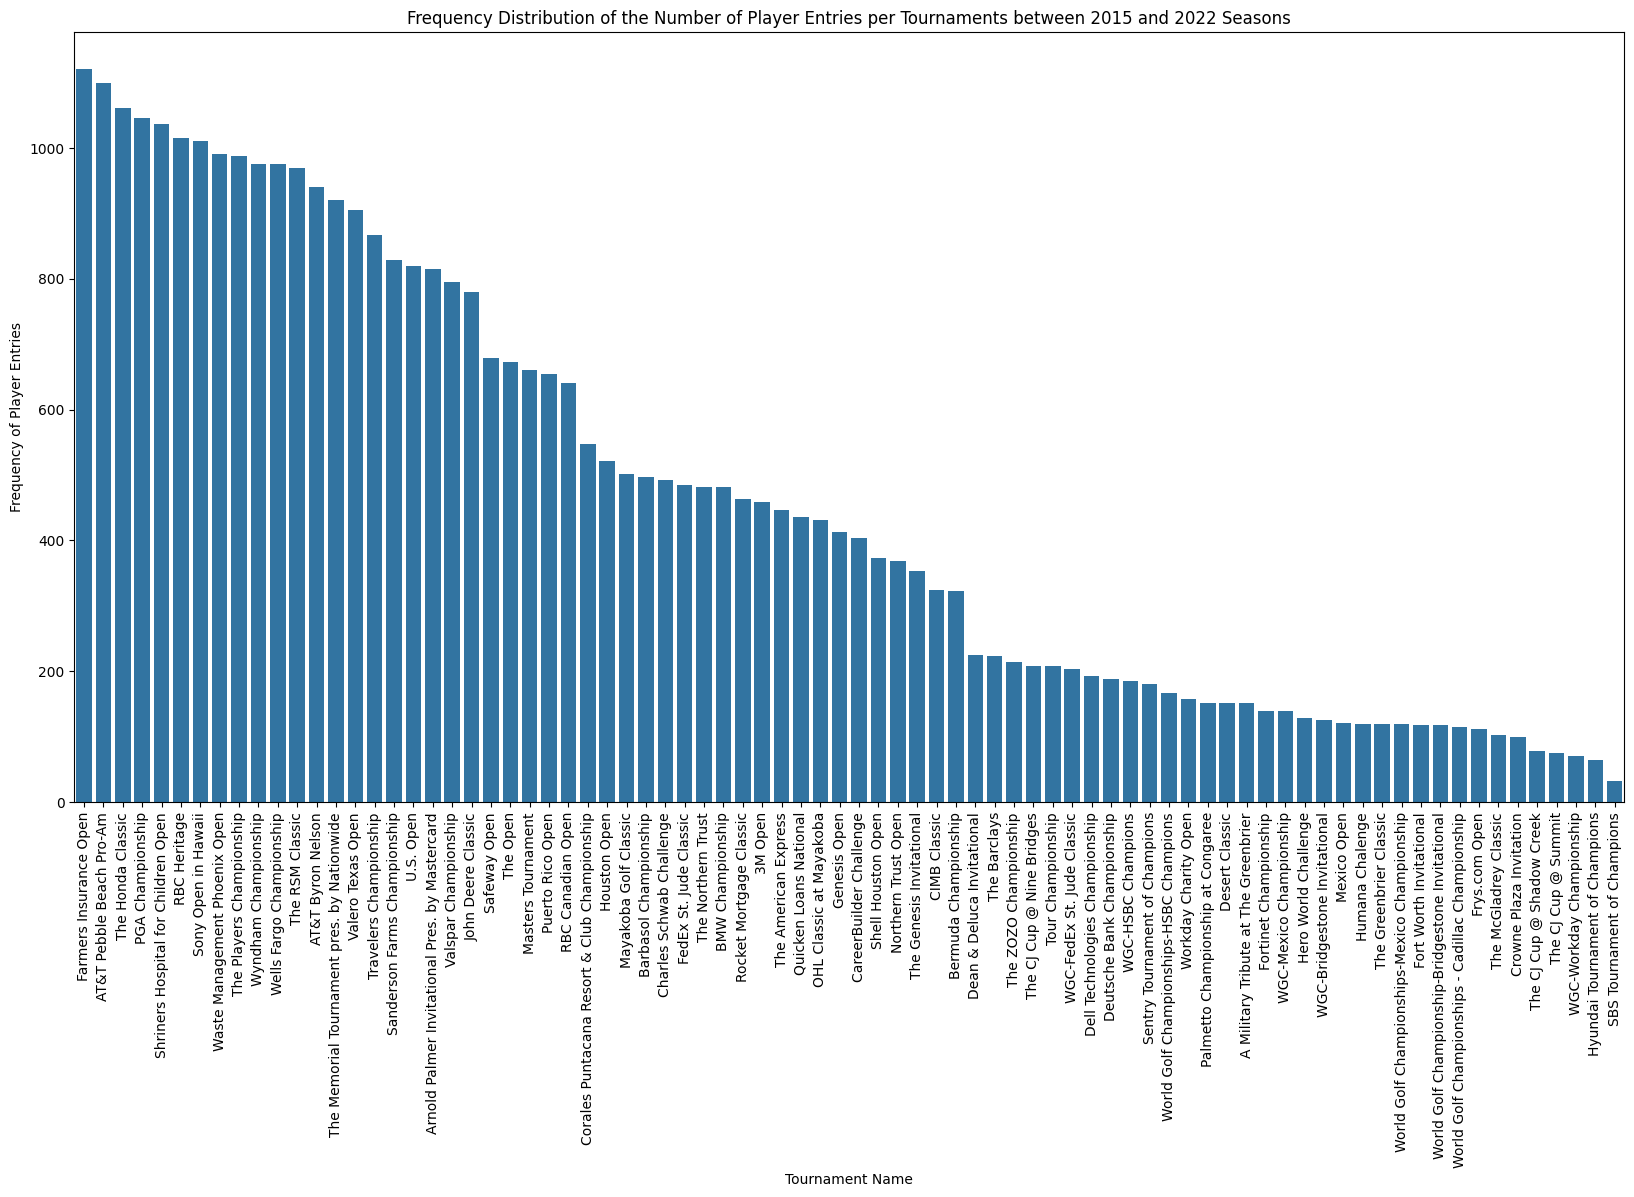

<Figure size 2000x1000 with 0 Axes>

<Axes: xlabel='course', ylabel='count'>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 [Text(0, 0, 'Pebble Beach Resort - Pebble Beach, CA'),
  Text(1, 0, 'Torrey Pines North - La Jolla, CA'),
  Text(2, 0, 'La Quinta CC - La Quinta, CA'),
  Text(3, 0, 'Muirfield Village Golf Club - Dublin, OH'),
  Text(4, 0, 'Sea Island Resort - Sea Island, GA'),
  Text(5, 0, 'PGA National - Palm Beach Gardens, FL'),
  Text(6, 0, 'TPC Summerlin - Las Vegas, NV'),
  Text(7, 0, 'Harbour Town Golf Links - Hilton Head Island, SC'),
  Text(8, 0, 'Riviera Coun

Text(0.5, 1.0, 'Frequency Distribution of the Number of Player Entries per Course between 2015 and 2022 Seasons')

Text(0.5, 0, 'Course Name')

Text(0, 0.5, 'Frequency of Player Entries')

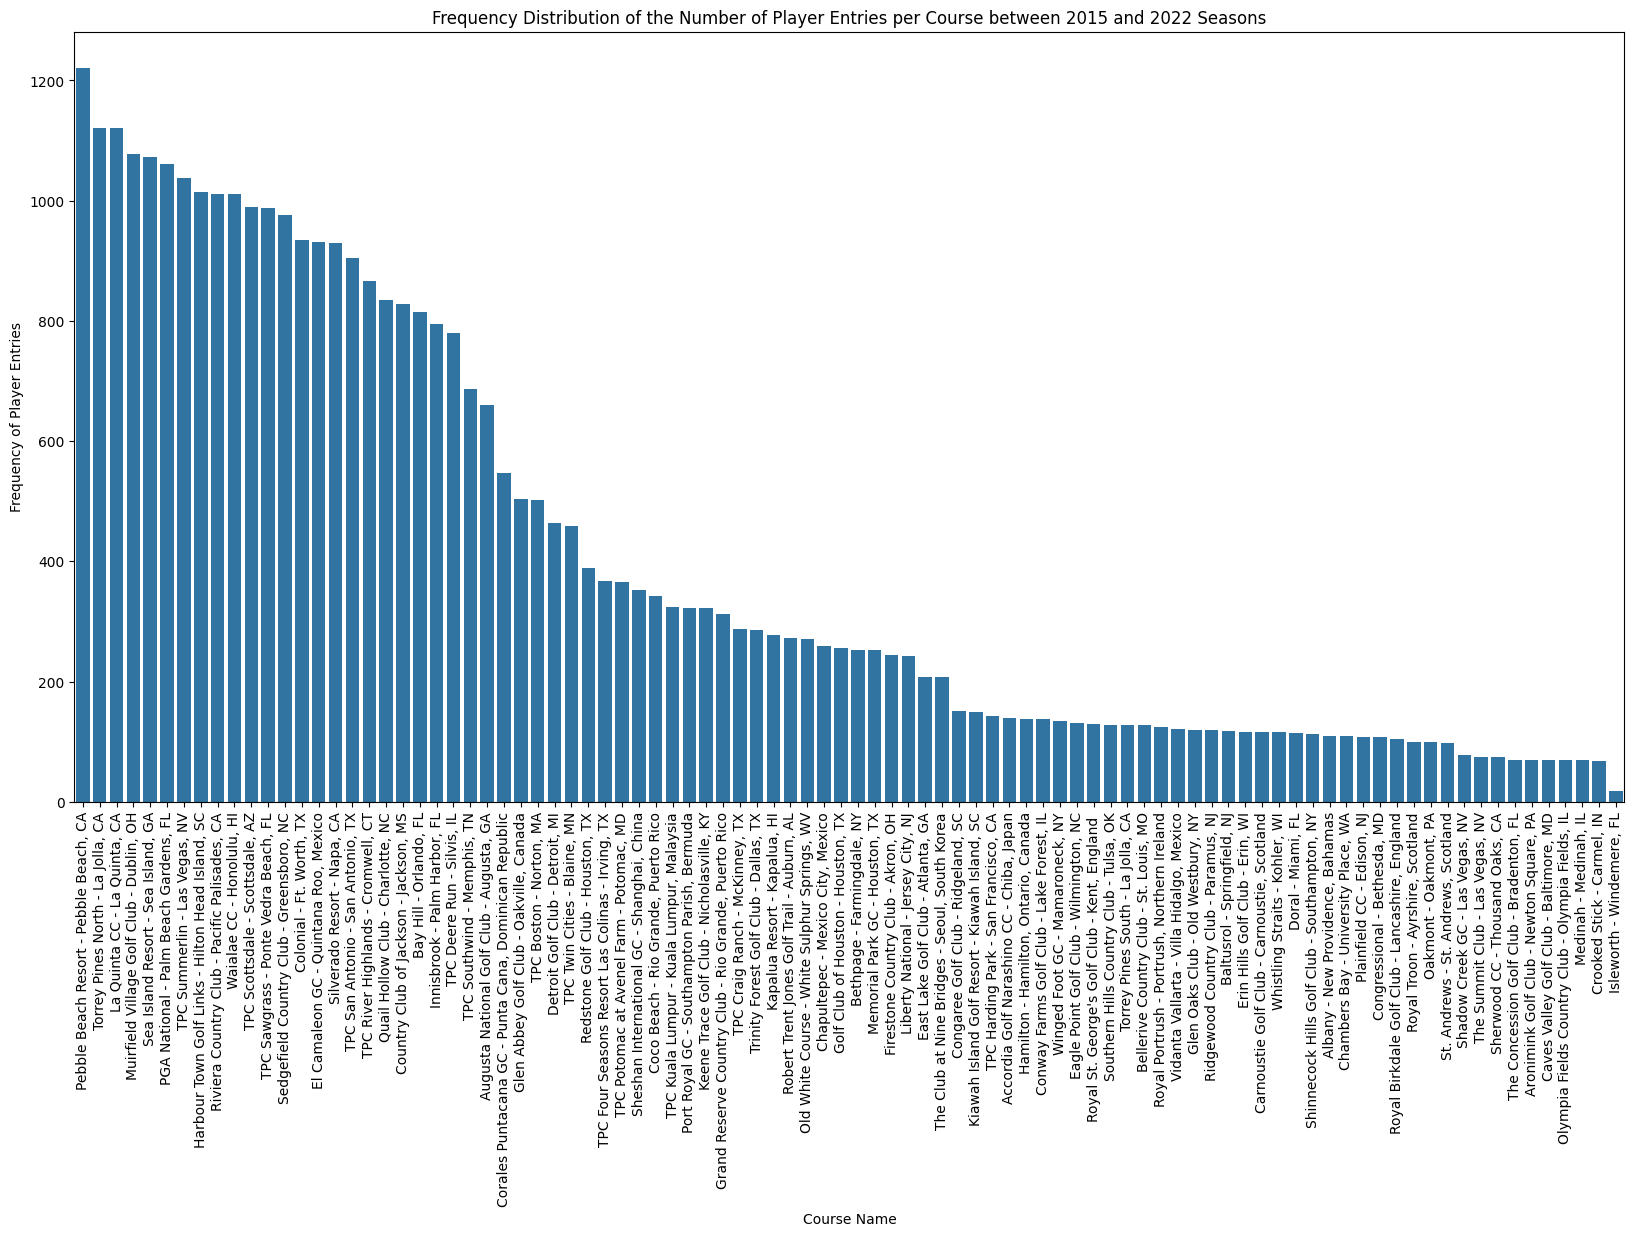

<Figure size 2000x1000 with 0 Axes>

<Axes: xlabel='season', ylabel='count'>

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018'),
  Text(4, 0, '2019'),
  Text(5, 0, '2020'),
  Text(6, 0, '2021'),
  Text(7, 0, '2022')])

Text(0.5, 1.0, 'Frequency Distribution of the Number of Player Entries per Seasons between 2015 and 2022 Seasons')

Text(0.5, 0, 'Season')

Text(0, 0.5, 'Frequency of Player Entries')

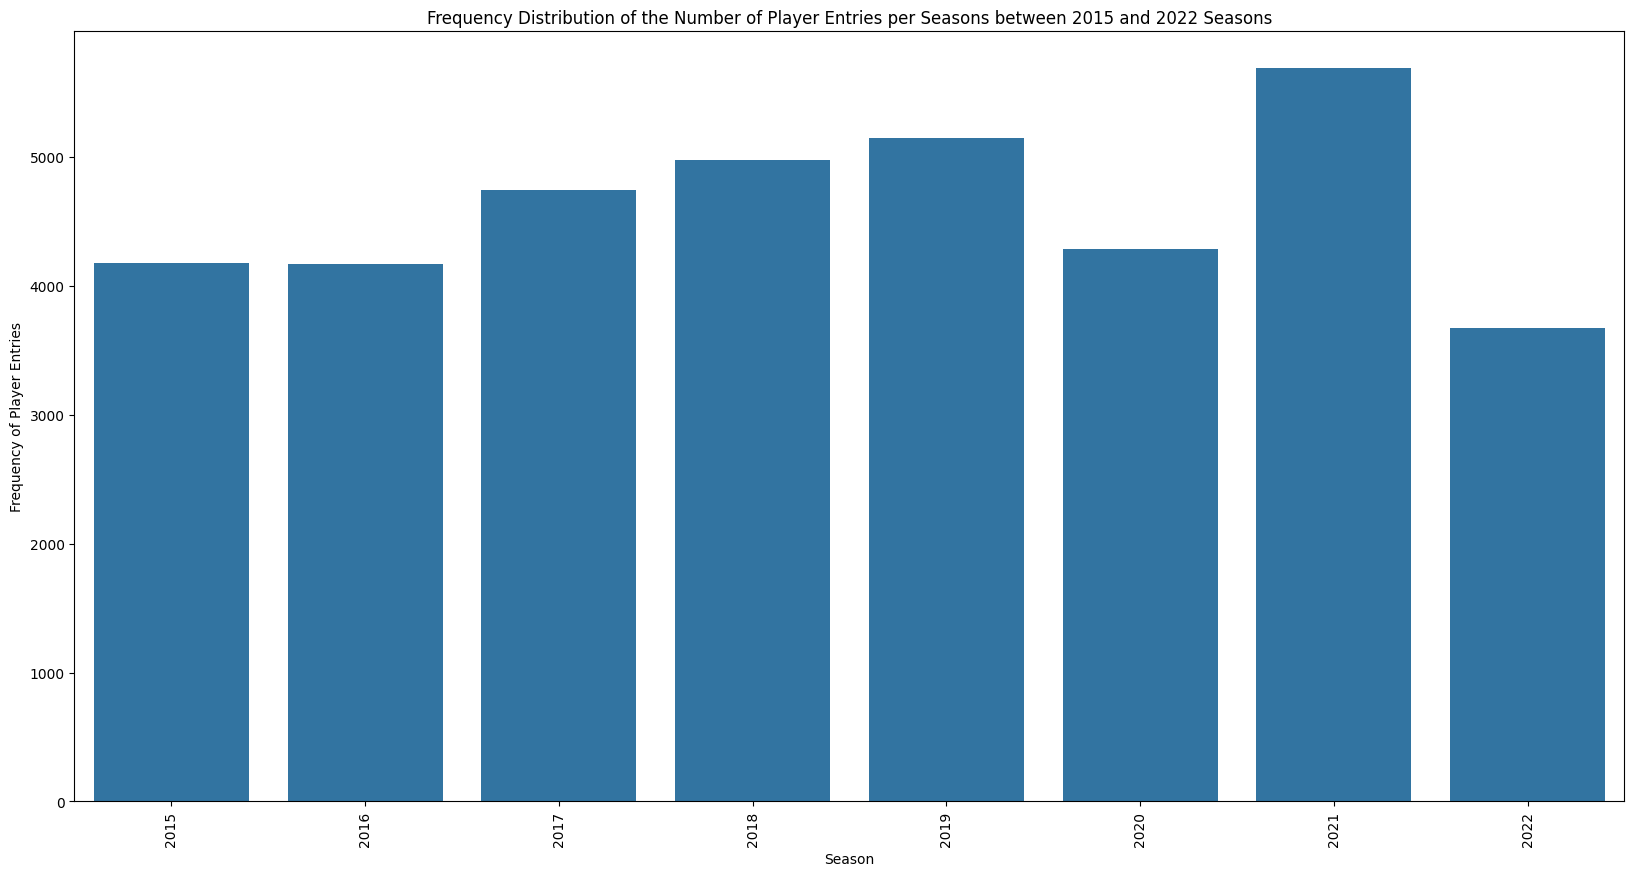

In [4]:
"""
Create bar charts for the categorical variables of interest
"""

# Create the bar chart for the `tournament name` variable
plt.figure(figsize=(20, 10))
sns.countplot(x='tournament name', data=pga_clean, order=pga_clean['tournament name'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Frequency Distribution of the Number of Player Entries per Tournaments between 2015 and 2022 Seasons')
plt.xlabel('Tournament Name')
plt.ylabel('Frequency of Player Entries')
plt.show()

# Create the bar chart for the `course` variable
plt.figure(figsize=(20, 10))
sns.countplot(x='course', data=pga_clean, order=pga_clean['course'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Frequency Distribution of the Number of Player Entries per Course between 2015 and 2022 Seasons')
plt.xlabel('Course Name')
plt.ylabel('Frequency of Player Entries')
plt.show()

# Create the bar chart for the 'season' variable
# Sort the season in the order they appear in the dataset
season_order = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
plt.figure(figsize=(20, 10))
sns.countplot(x='season', data=pga_clean, order=season_order)
plt.xticks(rotation=90)
plt.title('Frequency Distribution of the Number of Player Entries per Seasons between 2015 and 2022 Seasons')
plt.xlabel('Season')
plt.ylabel('Frequency of Player Entries')
plt.show()

### 2.2 Exploration of Numerical Tournament Specific Variables

**<u>Numerical Tournament Specific Variables to Explore:</u>**
- Date *[datetime variable type]*
- Purse
- hole_par
- no_cut

In [5]:
"""
Get the summary statistics for the numerical tournament specific variables including date, purse, hole_par, and no_cut
"""

# Define the numerical tournament specific variables
num_tournament_variables = ['date', 'purse', 'hole_par', 'no_cut']

# Get the summary statistics for the numerical tournament specific variables
pga_clean[num_tournament_variables].describe()

'\nGet the summary statistics for the numerical tournament specific variables including date, purse, hole_par, and no_cut\n'

,date,purse,hole_par,no_cut
count,36864,36864.000000,36864.000000,36864.000000
mean,2018-10-10 16:59:10.781249792,7.529612,225.547065,0.065294
min,2014-10-12 00:00:00,3.000000,70.000000,0.000000
25%,2017-01-15 00:00:00,6.400000,143.000000,0.000000
50%,2018-11-04 00:00:00,7.100000,280.000000,0.000000
75%,2020-09-13 00:00:00,8.700000,286.000000,0.000000
max,2022-06-05 00:00:00,20.000000,292.000000,1.000000
std,NaN,2.192712,70.295590,0.247047


'\nCreate histograms and boxplots for the numerical tournament specific variables including, date, purse, hole_par, no_cut\n'

Text(0.5, 0.98, 'Histograms and Boxplots of the Numerical Tournament Specific Variables between 2015 and 2022 Seasons \n')

<Axes: xlabel='date', ylabel='Count'>

[Text(16071.0, 0, '2014'),
 Text(16436.0, 0, '2015'),
 Text(16801.0, 0, '2016'),
 Text(17167.0, 0, '2017'),
 Text(17532.0, 0, '2018'),
 Text(17897.0, 0, '2019'),
 Text(18262.0, 0, '2020'),
 Text(18628.0, 0, '2021'),
 Text(18993.0, 0, '2022')]

Text(0.5, 1.0, 'Distribution of date between 2015 and 2022 Seasons')

Text(0.5, 0, 'date')

Text(0, 0.5, 'Frequency of Player Entries')

<Axes: xlabel='date'>

[Text(16071.0, 0, '2014'),
 Text(16436.0, 0, '2015'),
 Text(16801.0, 0, '2016'),
 Text(17167.0, 0, '2017'),
 Text(17532.0, 0, '2018'),
 Text(17897.0, 0, '2019'),
 Text(18262.0, 0, '2020'),
 Text(18628.0, 0, '2021'),
 Text(18993.0, 0, '2022')]

Text(0.5, 1.0, 'Boxplot of date between 2015 and 2022 Seasons')

Text(0.5, 0, 'date')

Text(0, 0.5, 'Frequency of Player Entries')

<Axes: xlabel='purse', ylabel='Count'>

[Text(0.0, 0, '0.0'),
 Text(2.5, 0, '2.5'),
 Text(5.0, 0, '5.0'),
 Text(7.5, 0, '7.5'),
 Text(10.0, 0, '10.0'),
 Text(12.5, 0, '12.5'),
 Text(15.0, 0, '15.0'),
 Text(17.5, 0, '17.5'),
 Text(20.0, 0, '20.0'),
 Text(22.5, 0, '22.5')]

Text(0.5, 1.0, 'Distribution of purse between 2015 and 2022 Seasons')

Text(0.5, 0, 'purse')

Text(0, 0.5, 'Frequency of Player Entries')

<Axes: xlabel='purse'>

[Text(0.0, 0, '0.0'),
 Text(2.5, 0, '2.5'),
 Text(5.0, 0, '5.0'),
 Text(7.5, 0, '7.5'),
 Text(10.0, 0, '10.0'),
 Text(12.5, 0, '12.5'),
 Text(15.0, 0, '15.0'),
 Text(17.5, 0, '17.5'),
 Text(20.0, 0, '20.0'),
 Text(22.5, 0, '22.5')]

Text(0.5, 1.0, 'Boxplot of purse between 2015 and 2022 Seasons')

Text(0.5, 0, 'purse')

Text(0, 0.5, 'Frequency of Player Entries')

<Axes: xlabel='hole_par', ylabel='Count'>

[Text(50.0, 0, '50'),
 Text(100.0, 0, '100'),
 Text(150.0, 0, '150'),
 Text(200.0, 0, '200'),
 Text(250.0, 0, '250'),
 Text(300.0, 0, '300'),
 Text(350.0, 0, '350')]

Text(0.5, 1.0, 'Distribution of hole_par between 2015 and 2022 Seasons')

Text(0.5, 0, 'hole_par')

Text(0, 0.5, 'Frequency of Player Entries')

<Axes: xlabel='hole_par'>

[Text(50.0, 0, '50'),
 Text(100.0, 0, '100'),
 Text(150.0, 0, '150'),
 Text(200.0, 0, '200'),
 Text(250.0, 0, '250'),
 Text(300.0, 0, '300'),
 Text(350.0, 0, '350')]

Text(0.5, 1.0, 'Boxplot of hole_par between 2015 and 2022 Seasons')

Text(0.5, 0, 'hole_par')

Text(0, 0.5, 'Frequency of Player Entries')

<Axes: xlabel='no_cut', ylabel='Count'>

[Text(-0.2, 0, '−0.2'),
 Text(0.0, 0, '0.0'),
 Text(0.2, 0, '0.2'),
 Text(0.4000000000000001, 0, '0.4'),
 Text(0.6000000000000001, 0, '0.6'),
 Text(0.8, 0, '0.8'),
 Text(1.0000000000000002, 0, '1.0'),
 Text(1.2000000000000002, 0, '1.2')]

Text(0.5, 1.0, 'Distribution of no_cut between 2015 and 2022 Seasons')

Text(0.5, 0, 'no_cut')

Text(0, 0.5, 'Frequency of Player Entries')

<Axes: xlabel='no_cut'>

[Text(-0.2, 0, '−0.2'),
 Text(0.0, 0, '0.0'),
 Text(0.2, 0, '0.2'),
 Text(0.4000000000000001, 0, '0.4'),
 Text(0.6000000000000001, 0, '0.6'),
 Text(0.8, 0, '0.8'),
 Text(1.0000000000000002, 0, '1.0'),
 Text(1.2000000000000002, 0, '1.2')]

Text(0.5, 1.0, 'Boxplot of no_cut between 2015 and 2022 Seasons')

Text(0.5, 0, 'no_cut')

Text(0, 0.5, 'Frequency of Player Entries')

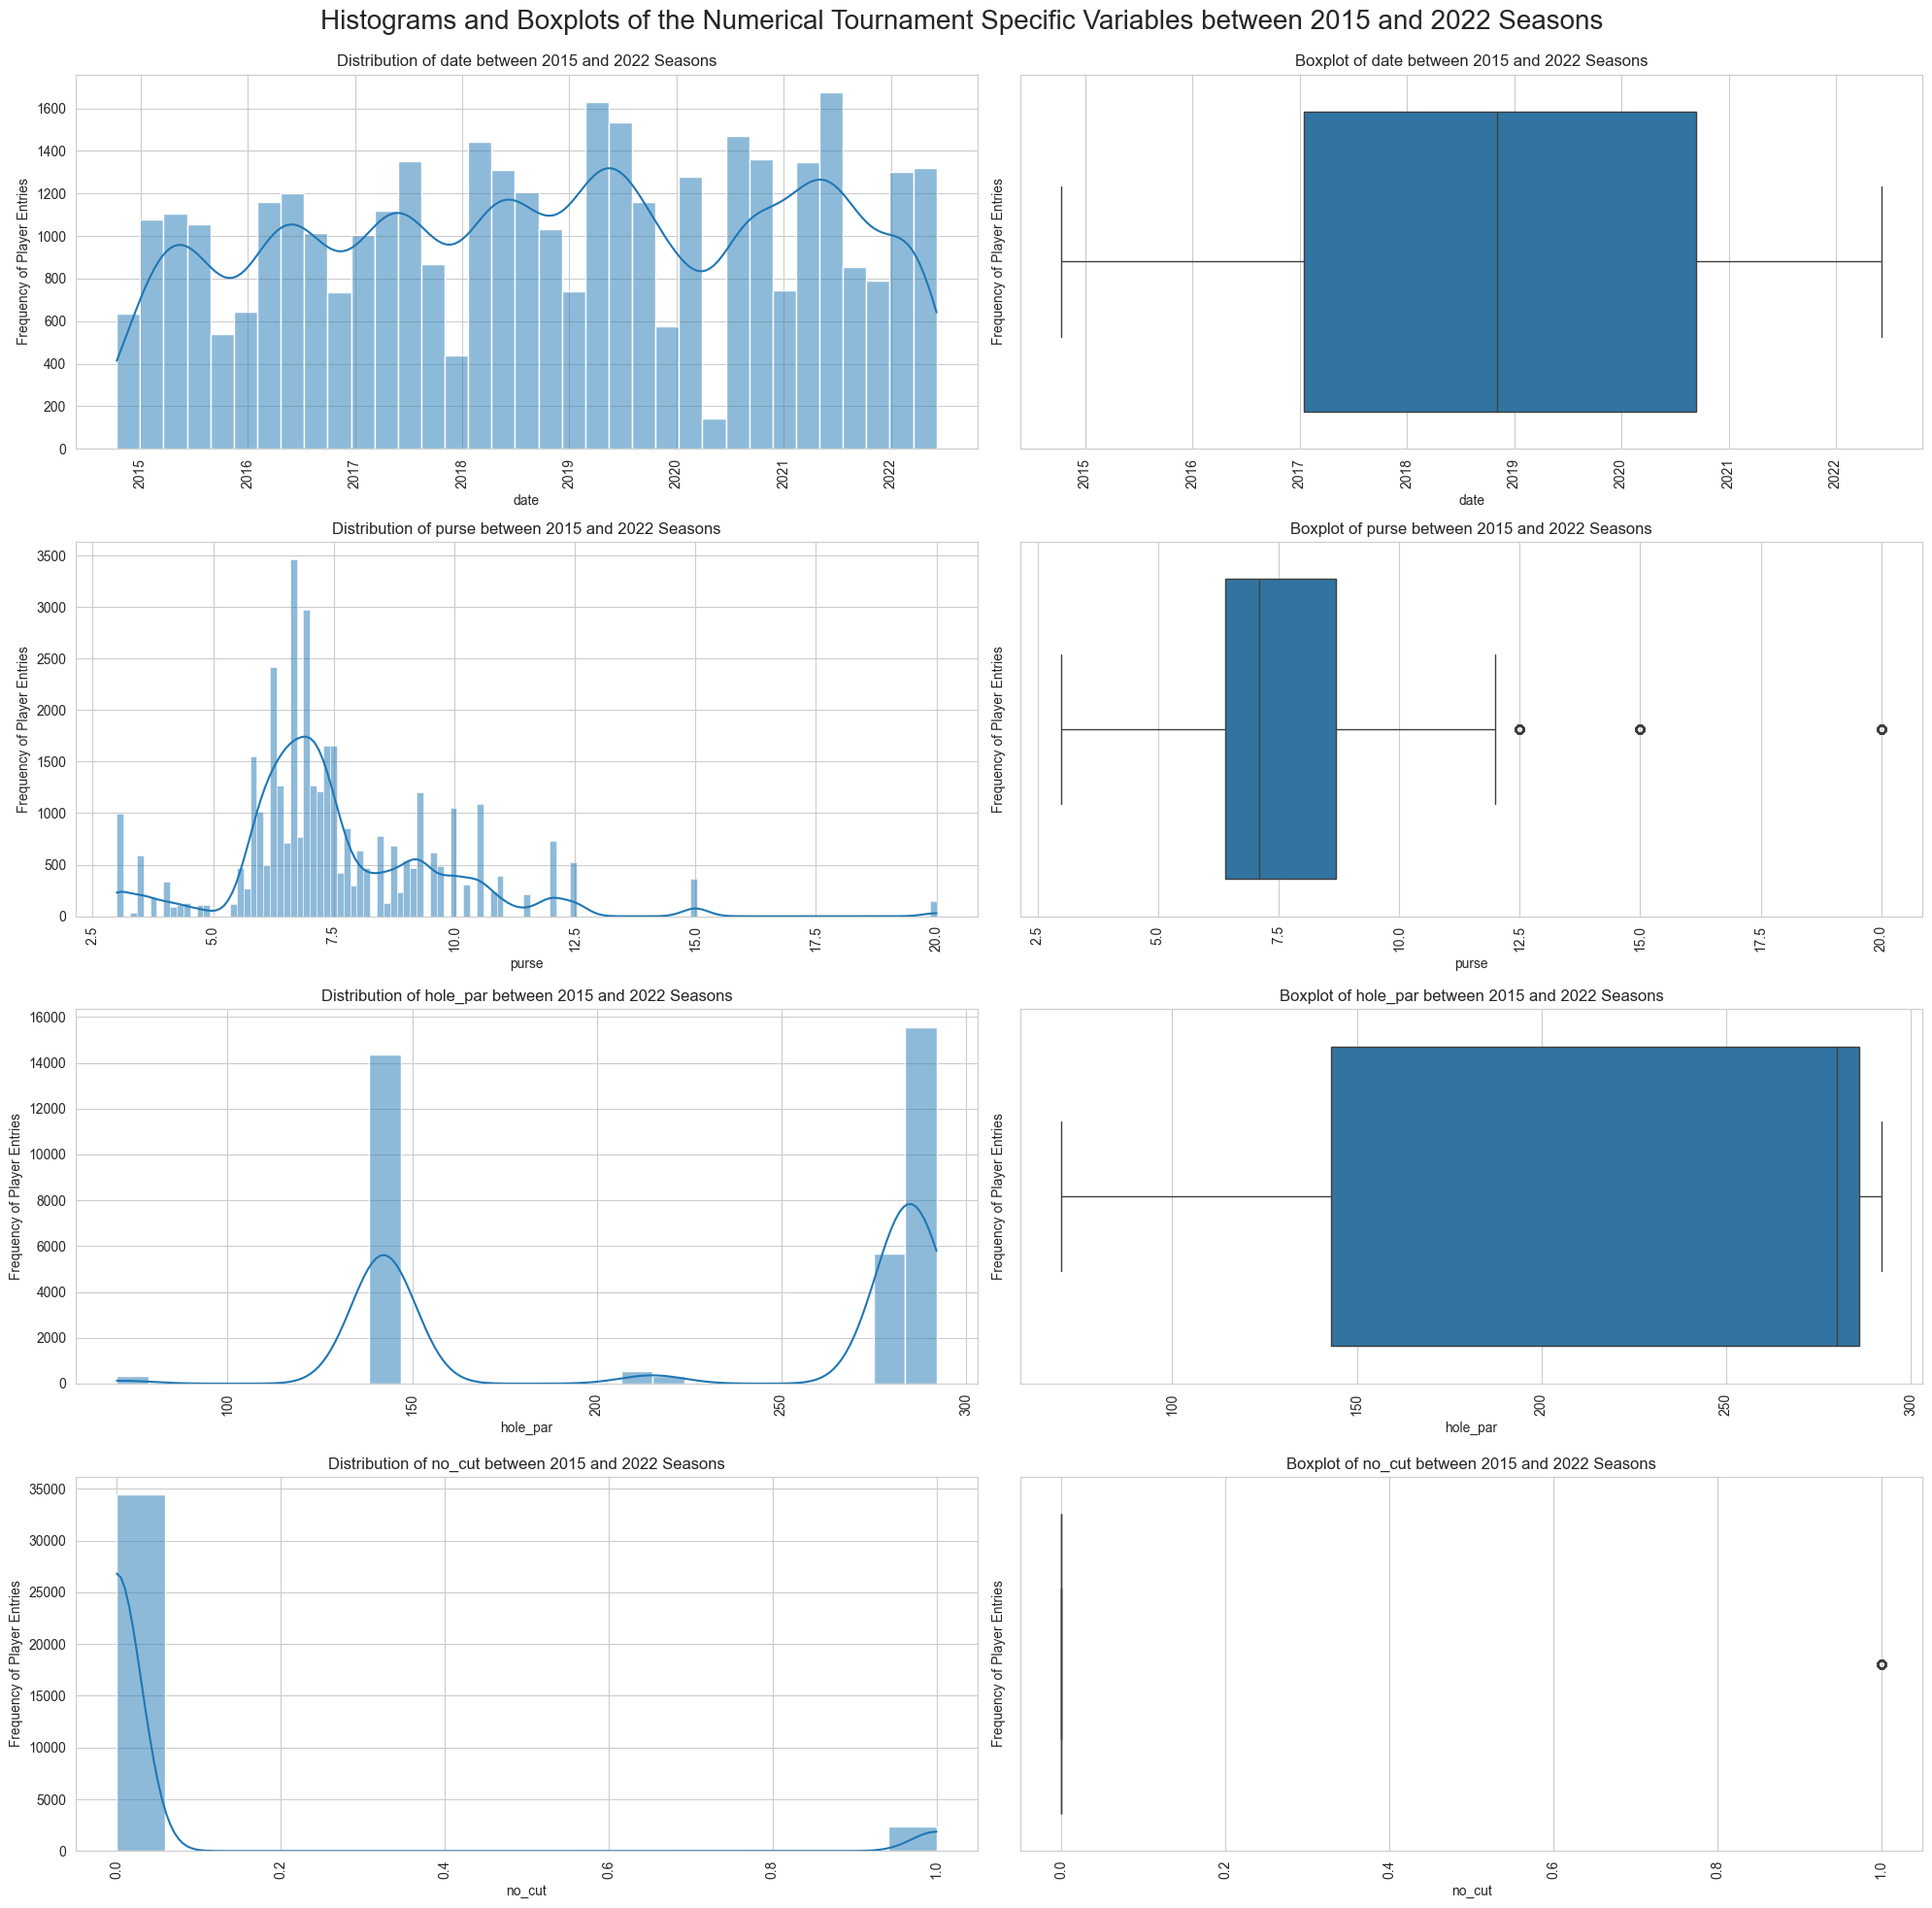

In [29]:
"""
Create histograms and boxplots for the numerical tournament specific variables including, date, purse, hole_par, no_cut
"""

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Define the numerical tournament specific variables
num_tournament_variables = ['date', 'purse', 'hole_par', 'no_cut']

# Create a 4x2 grid of plots
fig, axs = plt.subplots(4, 2, figsize=(20, 20))

# Supress the warning messages
import warnings
warnings.filterwarnings('ignore')

# Create a title for the figure
fig.suptitle('Histograms and Boxplots of the Numerical Tournament Specific Variables between 2015 and 2022 Seasons \n', fontsize=20)

# Loop through the numerical variables and create boxplots and histograms
for i, var in enumerate(num_tournament_variables):
    # Create the histogram for the variable
    sns.histplot(ax=axs[i, 0], x=var, data=pga_clean, kde=True)
    axs[i, 0].set_xticklabels(axs[i, 0].get_xticklabels(), rotation=90)
    axs[i, 0].set_title(f'Distribution of {var} between 2015 and 2022 Seasons')
    axs[i, 0].set_xlabel(var)
    axs[i, 0].set_ylabel('Frequency of Player Entries')
    
    # Create the boxplot for the variable
    sns.boxplot(ax=axs[i, 1], x=var, data=pga_clean)
    axs[i, 1].set_xticklabels(axs[i, 1].get_xticklabels(), rotation=90)
    axs[i, 1].set_title(f'Boxplot of {var} between 2015 and 2022 Seasons')
    axs[i, 1].set_xlabel(var)
    axs[i, 1].set_ylabel('Frequency of Player Entries')

plt.tight_layout()

### 2.3 Exploration of Numerical Player Performance Variables
1. **Summary Statistics**: For each of the numerical player performance variables, compute the summary statistics using `.describe()` to get a sense of the central tendency and dispersion of the variables.
2. **Visualizations for Numberical Variables**: Create histograms and box plots to visualize the distributions of the numerical variables.

**<u>Numerical Player Performance Variables to Explore:</u>**
- strokes
- n_rounds
- made_cut
- pos
- course_experience

In [7]:
"""
Get the summary statistics for the numerical player performance variables including strokes, n_rounds, made_cut, pos,
and course_experience
"""

# Define the numerical player performance variables
num_player_performance_variables = ['strokes', 'n_rounds', 'made_cut', 'pos', 'course_experience']

# Get the summary statistics for the numerical player performance variables
pga_clean[num_player_performance_variables].describe()

'\nGet the summary statistics for the numerical player performance variables including strokes, n_rounds, made_cut, pos,\nand course_experience\n'

,strokes,n_rounds,made_cut,pos,course_experience
count,36864.000000,36864.000000,36864.000000,36864.000000,36864.000000
mean,224.114502,3.175266,0.605903,19.568522,3.981038
std,66.789007,0.983446,0.488663,23.314809,5.230326
min,66.000000,1.000000,0.000000,0.000000,0.000000
25%,146.000000,2.000000,0.000000,0.000000,0.000000
50%,272.000000,4.000000,1.000000,8.000000,2.000000
75%,281.000000,4.000000,1.000000,37.000000,6.000000
max,325.000000,4.000000,1.000000,91.000000,32.000000


'\nCreate histograms and boxplots for the numerical player performance variables including strokes, n_rounds, made_cut,\npos, and course_experience\n'

Text(0.5, 0.98, 'Histograms and Boxplots of Player Performance Variables between 2015 and 2022 Seasons \n')

<Axes: xlabel='strokes', ylabel='Count'>

[Text(50.0, 0, '50'),
 Text(100.0, 0, '100'),
 Text(150.0, 0, '150'),
 Text(200.0, 0, '200'),
 Text(250.0, 0, '250'),
 Text(300.0, 0, '300'),
 Text(350.0, 0, '350')]

Text(0.5, 1.0, 'Distribution of strokes between 2015 and 2022 Seasons')

Text(0.5, 0, 'strokes')

Text(0, 0.5, 'Frequency of Player Entries')

<Axes: xlabel='strokes'>

[Text(100.0, 0, '100'),
 Text(125.0, 0, '125'),
 Text(150.0, 0, '150'),
 Text(175.0, 0, '175'),
 Text(200.0, 0, '200'),
 Text(225.0, 0, '225'),
 Text(250.0, 0, '250'),
 Text(275.0, 0, '275'),
 Text(300.0, 0, '300'),
 Text(325.0, 0, '325'),
 Text(350.0, 0, '350')]

Text(0.5, 1.0, 'Boxplot of strokes between 2015 and 2022 Seasons')

Text(0.5, 0, 'strokes')

Text(0, 0.5, 'Frequency of Player Entries')

<Axes: xlabel='n_rounds', ylabel='Count'>

[Text(0.5, 0, '0.5'),
 Text(1.0, 0, '1.0'),
 Text(1.5, 0, '1.5'),
 Text(2.0, 0, '2.0'),
 Text(2.5, 0, '2.5'),
 Text(3.0, 0, '3.0'),
 Text(3.5, 0, '3.5'),
 Text(4.0, 0, '4.0'),
 Text(4.5, 0, '4.5')]

Text(0.5, 1.0, 'Distribution of n_rounds between 2015 and 2022 Seasons')

Text(0.5, 0, 'n_rounds')

Text(0, 0.5, 'Frequency of Player Entries')

<Axes: xlabel='n_rounds'>

[Text(1.75, 0, '1.75'),
 Text(2.0, 0, '2.00'),
 Text(2.25, 0, '2.25'),
 Text(2.5, 0, '2.50'),
 Text(2.75, 0, '2.75'),
 Text(3.0, 0, '3.00'),
 Text(3.25, 0, '3.25'),
 Text(3.5, 0, '3.50'),
 Text(3.75, 0, '3.75'),
 Text(4.0, 0, '4.00'),
 Text(4.25, 0, '4.25')]

Text(0.5, 1.0, 'Boxplot of n_rounds between 2015 and 2022 Seasons')

Text(0.5, 0, 'n_rounds')

Text(0, 0.5, 'Frequency of Player Entries')

<Axes: xlabel='made_cut', ylabel='Count'>

[Text(-0.2, 0, '−0.2'),
 Text(0.0, 0, '0.0'),
 Text(0.2, 0, '0.2'),
 Text(0.4000000000000001, 0, '0.4'),
 Text(0.6000000000000001, 0, '0.6'),
 Text(0.8, 0, '0.8'),
 Text(1.0000000000000002, 0, '1.0'),
 Text(1.2000000000000002, 0, '1.2')]

Text(0.5, 1.0, 'Distribution of made_cut between 2015 and 2022 Seasons')

Text(0.5, 0, 'made_cut')

Text(0, 0.5, 'Frequency of Player Entries')

<Axes: xlabel='made_cut'>

[Text(-0.2, 0, '−0.2'),
 Text(0.0, 0, '0.0'),
 Text(0.2, 0, '0.2'),
 Text(0.4000000000000001, 0, '0.4'),
 Text(0.6000000000000001, 0, '0.6'),
 Text(0.8, 0, '0.8'),
 Text(1.0000000000000002, 0, '1.0'),
 Text(1.2000000000000002, 0, '1.2')]

Text(0.5, 1.0, 'Boxplot of made_cut between 2015 and 2022 Seasons')

Text(0.5, 0, 'made_cut')

Text(0, 0.5, 'Frequency of Player Entries')

<Axes: xlabel='pos', ylabel='Count'>

[Text(-20.0, 0, '−20'),
 Text(0.0, 0, '0'),
 Text(20.0, 0, '20'),
 Text(40.0, 0, '40'),
 Text(60.0, 0, '60'),
 Text(80.0, 0, '80'),
 Text(100.0, 0, '100')]

Text(0.5, 1.0, 'Distribution of pos between 2015 and 2022 Seasons')

Text(0.5, 0, 'pos')

Text(0, 0.5, 'Frequency of Player Entries')

<Axes: xlabel='pos'>

[Text(-20.0, 0, '−20'),
 Text(0.0, 0, '0'),
 Text(20.0, 0, '20'),
 Text(40.0, 0, '40'),
 Text(60.0, 0, '60'),
 Text(80.0, 0, '80'),
 Text(100.0, 0, '100')]

Text(0.5, 1.0, 'Boxplot of pos between 2015 and 2022 Seasons')

Text(0.5, 0, 'pos')

Text(0, 0.5, 'Frequency of Player Entries')

<Axes: xlabel='course_experience', ylabel='Count'>

[Text(-5.0, 0, '−5'),
 Text(0.0, 0, '0'),
 Text(5.0, 0, '5'),
 Text(10.0, 0, '10'),
 Text(15.0, 0, '15'),
 Text(20.0, 0, '20'),
 Text(25.0, 0, '25'),
 Text(30.0, 0, '30'),
 Text(35.0, 0, '35')]

Text(0.5, 1.0, 'Distribution of course_experience between 2015 and 2022 Seasons')

Text(0.5, 0, 'course_experience')

Text(0, 0.5, 'Frequency of Player Entries')

<Axes: xlabel='course_experience'>

[Text(-5.0, 0, '−5'),
 Text(0.0, 0, '0'),
 Text(5.0, 0, '5'),
 Text(10.0, 0, '10'),
 Text(15.0, 0, '15'),
 Text(20.0, 0, '20'),
 Text(25.0, 0, '25'),
 Text(30.0, 0, '30'),
 Text(35.0, 0, '35')]

Text(0.5, 1.0, 'Boxplot of course_experience between 2015 and 2022 Seasons')

Text(0.5, 0, 'course_experience')

Text(0, 0.5, 'Frequency of Player Entries')

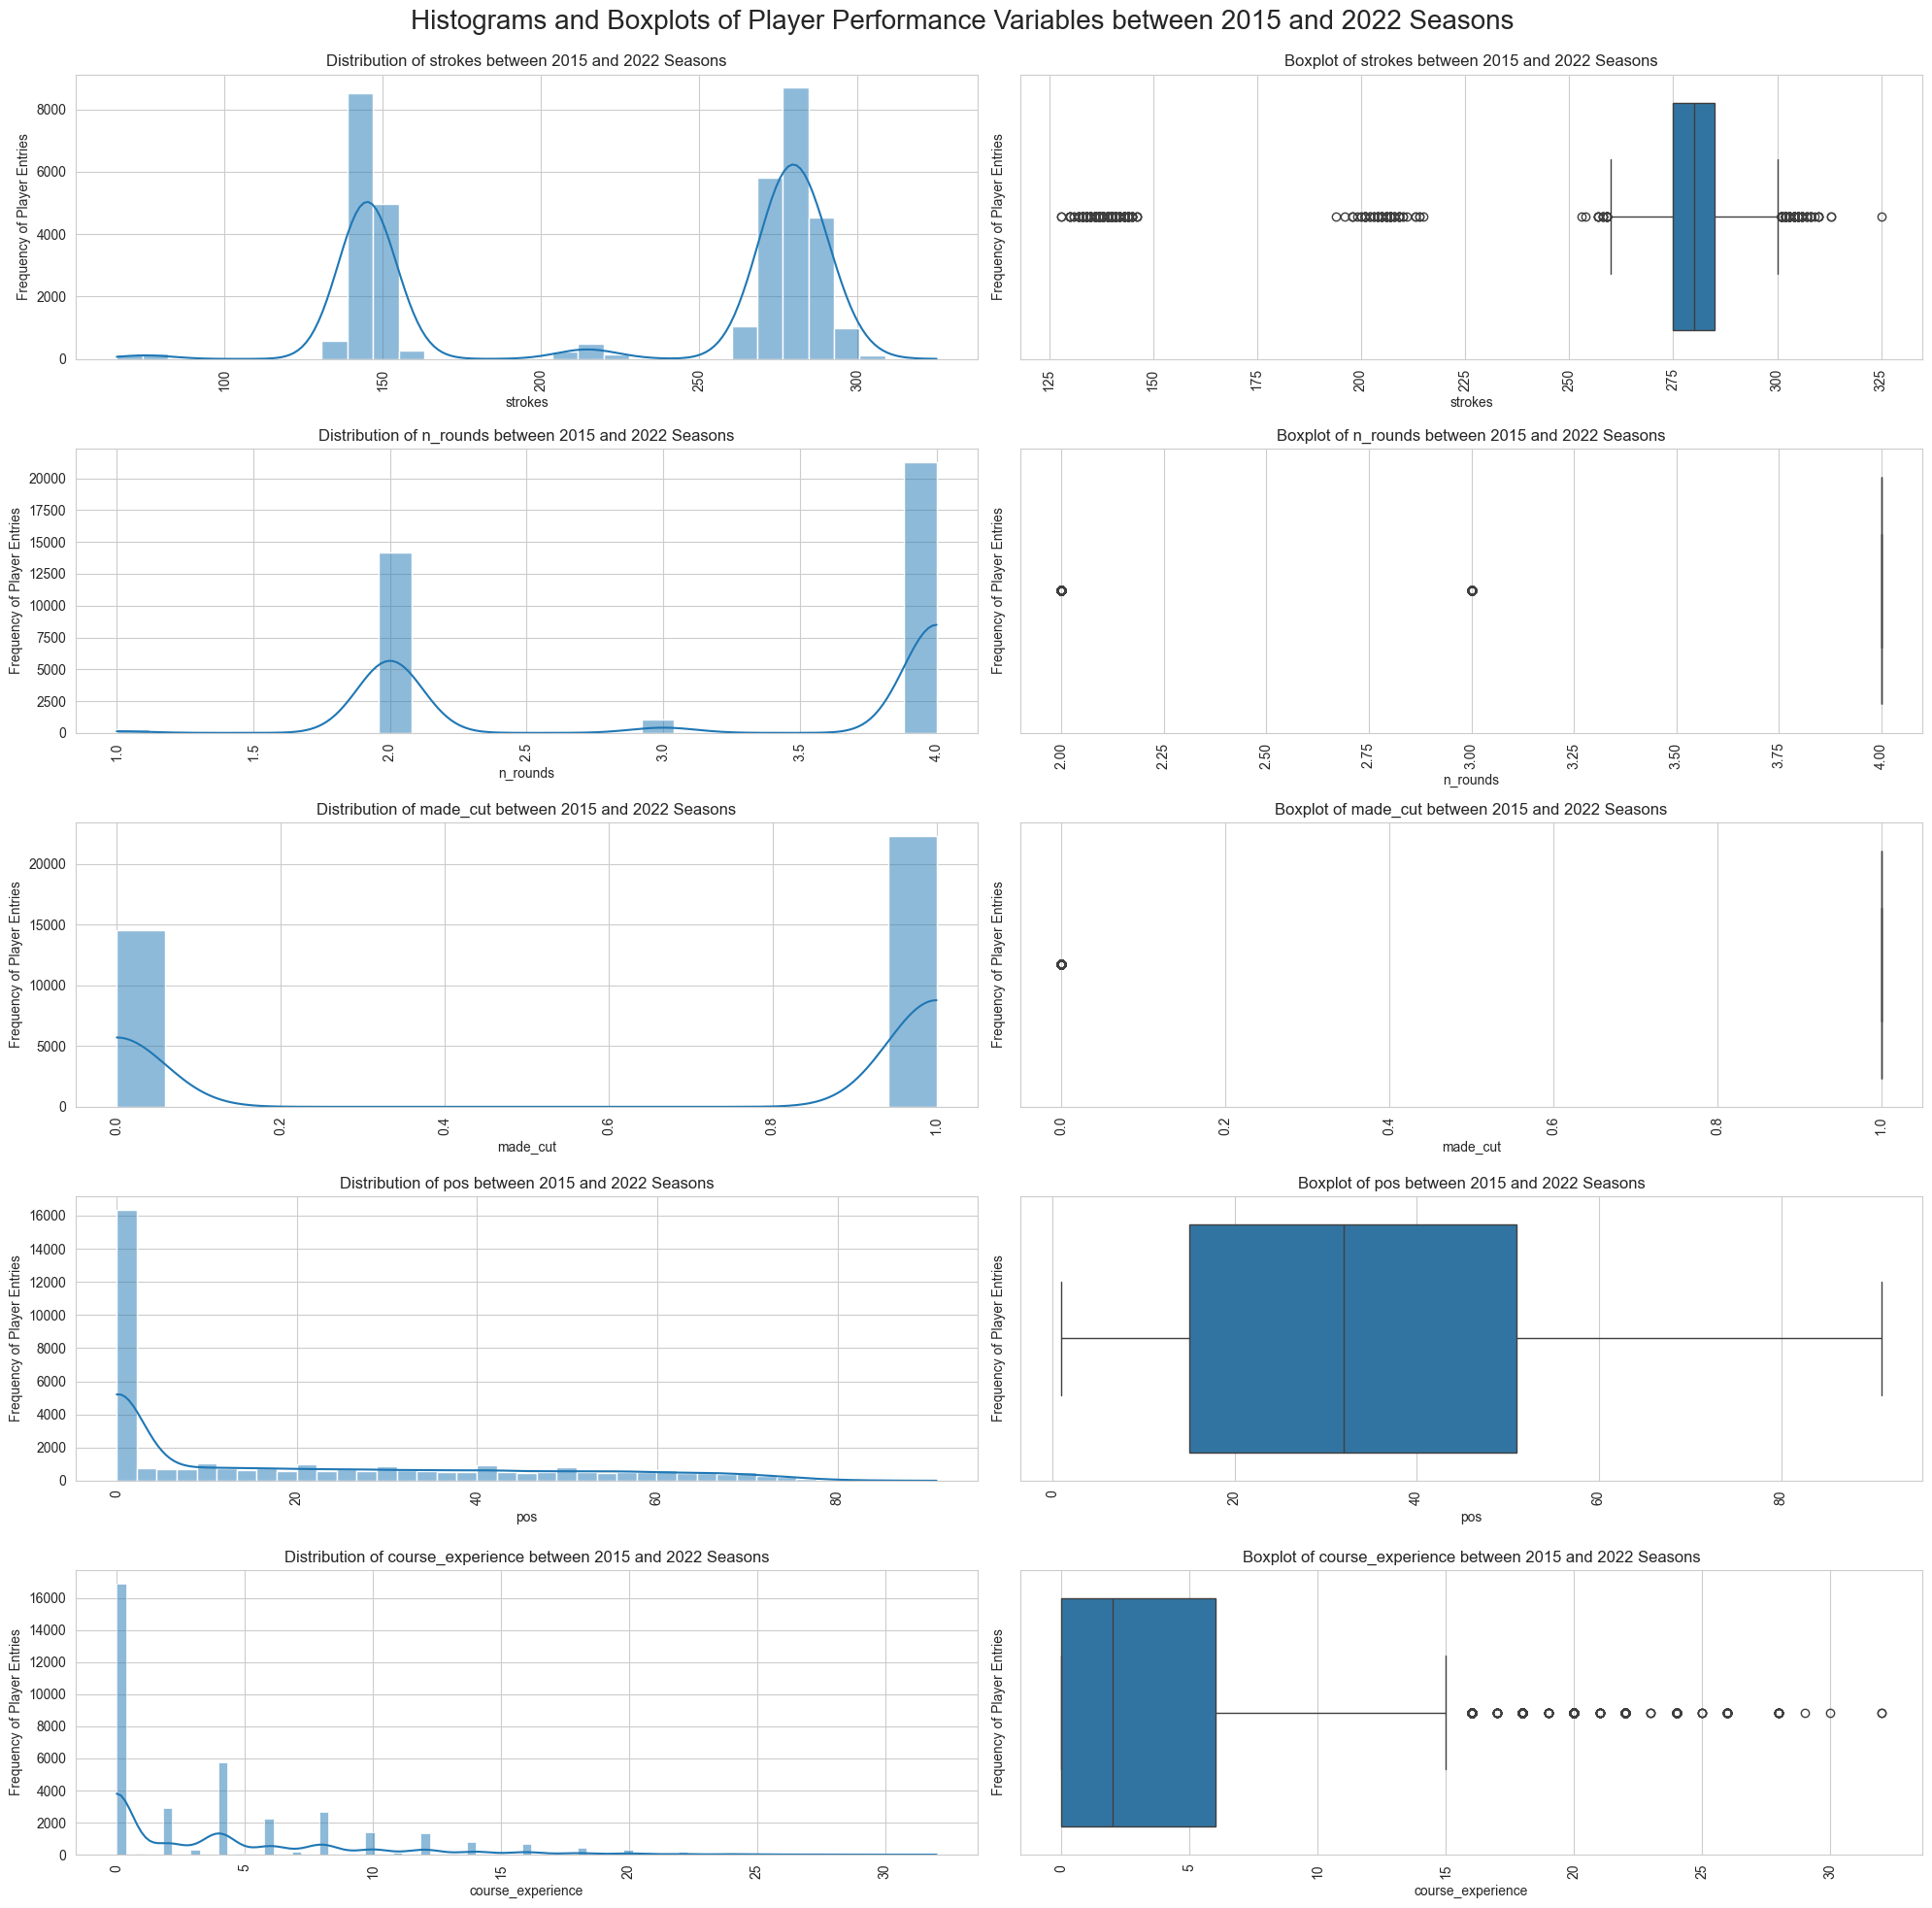

In [27]:
"""
Create histograms and boxplots for the numerical player performance variables including strokes, n_rounds, made_cut,
pos, and course_experience
"""

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Define the numerical player performance variables
num_player_performance_variables = ['strokes', 'n_rounds', 'made_cut', 'pos', 'course_experience']

# Create a 5x2 grid of plots
fig, axs = plt.subplots(5, 2, figsize=(20, 20))

# Supress the warning messages
warnings.filterwarnings('ignore')

# Create a title for the plots
fig.suptitle('Histograms and Boxplots of Player Performance Variables between 2015 and 2022 Seasons \n', fontsize=20)

# Loop through the numerical variables and create boxplots and histograms
for i, var in enumerate(num_player_performance_variables):
    # Create the histogram for the variable
    sns.histplot(ax=axs[i, 0], x=var, data=pga_clean, kde=True)
    axs[i, 0].set_xticklabels(axs[i, 0].get_xticklabels(), rotation=90)
    axs[i, 0].set_title(f'Distribution of {var} between 2015 and 2022 Seasons')
    axs[i, 0].set_xlabel(var)
    axs[i, 0].set_ylabel('Frequency of Player Entries')
    
    # Create the boxplot for the variable
    sns.boxplot(ax=axs[i, 1], x=var, data=pga_clean_valid)
    axs[i, 1].set_xticklabels(axs[i, 1].get_xticklabels(), rotation=90)
    axs[i, 1].set_title(f'Boxplot of {var} between 2015 and 2022 Seasons')
    axs[i, 1].set_xlabel(var)
    axs[i, 1].set_ylabel('Frequency of Player Entries')
    
plt.tight_layout()

### 2.4 Exploration of Strokes-Gained Variables
1. **Summary Statistics**: For each of the strokes-gained variables, compute the summary statistics using `.describe()` to get a sense of the central tendency and dispersion of the variables.
2. **Visualizations for Strokes-Gained Variables**: Create histograms and box plots to visualize the distributions of the strokes-gained variables.

**<u>Strokes-Gained Variables to Explore:</u>**
- sg_putt
- sg_arg
- sg_app
- sg_ott
- sg_t2g
- sg_total 

In [9]:
"""
Get the summary statistics for the strokes-gained variables including sg_putt, sg_arg, sg_app, sg_ott, sg_t2g, and
sg_total
"""

# Define the strokes-gained variables
sg_variables = ['sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total']

# Get the summary statistics for the strokes-gained variables
sg_data[sg_variables].describe()

'\nGet the summary statistics for the strokes-gained variables including sg_putt, sg_arg, sg_app, sg_ott, sg_t2g, and\nsg_total\n'

,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
count,29180.000000,29180.000000,29180.000000,29180.000000,29180.000000,29180.000000
mean,-0.121005,-0.040744,-0.101759,-0.045896,-0.188346,-0.305578
std,1.119451,0.727315,1.119763,0.808139,1.640817,1.966647
min,-5.990000,-6.430000,-9.250000,-7.740000,-13.950000,-13.670000
25%,-0.770000,-0.450000,-0.740000,-0.450000,-1.080000,-1.370000
50%,-0.040000,0.000000,0.000000,0.050000,-0.010000,-0.160000
75%,0.630000,0.420000,0.640000,0.480000,0.920000,1.060000
max,4.430000,3.170000,4.670000,2.770000,6.300000,8.520000


'\nCreate histograms and boxplots for the strokes-gained variables including sg_putt, sg_arg, sg_app, sg_ott, sg_t2g, and\nsg_total\n'

<Axes: xlabel='sg_putt', ylabel='Count'>

[Text(-8.0, 0, '−8'),
 Text(-6.0, 0, '−6'),
 Text(-4.0, 0, '−4'),
 Text(-2.0, 0, '−2'),
 Text(0.0, 0, '0'),
 Text(2.0, 0, '2'),
 Text(4.0, 0, '4'),
 Text(6.0, 0, '6')]

Text(0.5, 1.0, 'Histogram of Strokes Gained Putting per Player between 2015 and 2022 Seasons')

Text(0.5, 0, 'Strokes Gained Putting')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='sg_putt'>

[Text(-8.0, 0, '−8'),
 Text(-6.0, 0, '−6'),
 Text(-4.0, 0, '−4'),
 Text(-2.0, 0, '−2'),
 Text(0.0, 0, '0'),
 Text(2.0, 0, '2'),
 Text(4.0, 0, '4'),
 Text(6.0, 0, '6')]

Text(0.5, 1.0, 'Boxplot of Strokes Gained Putting per Player between 2015 and 2022 Seasons')

Text(0.5, 0, 'Strokes Gained Putting')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='sg_arg', ylabel='Count'>

[Text(-8.0, 0, '−8'),
 Text(-6.0, 0, '−6'),
 Text(-4.0, 0, '−4'),
 Text(-2.0, 0, '−2'),
 Text(0.0, 0, '0'),
 Text(2.0, 0, '2'),
 Text(4.0, 0, '4')]

Text(0.5, 1.0, 'Histogram of Strokes Gained Around the Green per Player between 2015 and 2022 Seasons')

Text(0.5, 0, 'Strokes Gained Around the Green')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='sg_arg'>

[Text(-8.0, 0, '−8'),
 Text(-6.0, 0, '−6'),
 Text(-4.0, 0, '−4'),
 Text(-2.0, 0, '−2'),
 Text(0.0, 0, '0'),
 Text(2.0, 0, '2'),
 Text(4.0, 0, '4')]

Text(0.5, 1.0, 'Boxplot of Strokes Gained Around the Green per Player between 2015 and 2022 Seasons')

Text(0.5, 0, 'Strokes Gained Around the Green')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='sg_app', ylabel='Count'>

[Text(-10.0, 0, '−10'),
 Text(-8.0, 0, '−8'),
 Text(-6.0, 0, '−6'),
 Text(-4.0, 0, '−4'),
 Text(-2.0, 0, '−2'),
 Text(0.0, 0, '0'),
 Text(2.0, 0, '2'),
 Text(4.0, 0, '4'),
 Text(6.0, 0, '6')]

Text(0.5, 1.0, 'Histogram of Strokes Gained Approach per Player between 2015 and 2022 Seasons')

Text(0.5, 0, 'Strokes Gained Approach')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='sg_app'>

[Text(-10.0, 0, '−10'),
 Text(-8.0, 0, '−8'),
 Text(-6.0, 0, '−6'),
 Text(-4.0, 0, '−4'),
 Text(-2.0, 0, '−2'),
 Text(0.0, 0, '0'),
 Text(2.0, 0, '2'),
 Text(4.0, 0, '4'),
 Text(6.0, 0, '6')]

Text(0.5, 1.0, 'Boxplot of Strokes Gained Approach per Player between 2015 and 2022 Seasons')

Text(0.5, 0, 'Strokes Gained Approach')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='sg_ott', ylabel='Count'>

[Text(-10.0, 0, '−10'),
 Text(-8.0, 0, '−8'),
 Text(-6.0, 0, '−6'),
 Text(-4.0, 0, '−4'),
 Text(-2.0, 0, '−2'),
 Text(0.0, 0, '0'),
 Text(2.0, 0, '2'),
 Text(4.0, 0, '4')]

Text(0.5, 1.0, 'Histogram of Strokes Gained Off the Tee per Player between 2015 and 2022 Seasons')

Text(0.5, 0, 'Strokes Gained Off the Tee')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='sg_ott'>

[Text(-10.0, 0, '−10'),
 Text(-8.0, 0, '−8'),
 Text(-6.0, 0, '−6'),
 Text(-4.0, 0, '−4'),
 Text(-2.0, 0, '−2'),
 Text(0.0, 0, '0'),
 Text(2.0, 0, '2'),
 Text(4.0, 0, '4')]

Text(0.5, 1.0, 'Boxplot of Strokes Gained Off the Tee per Player between 2015 and 2022 Seasons')

Text(0.5, 0, 'Strokes Gained Off the Tee')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='sg_t2g', ylabel='Count'>

[Text(-15.0, 0, '−15.0'),
 Text(-12.5, 0, '−12.5'),
 Text(-10.0, 0, '−10.0'),
 Text(-7.5, 0, '−7.5'),
 Text(-5.0, 0, '−5.0'),
 Text(-2.5, 0, '−2.5'),
 Text(0.0, 0, '0.0'),
 Text(2.5, 0, '2.5'),
 Text(5.0, 0, '5.0'),
 Text(7.5, 0, '7.5')]

Text(0.5, 1.0, 'Histogram of Strokes Gained Tee to Green per Player between 2015 and 2022 Seasons')

Text(0.5, 0, 'Strokes Gained Tee to Green')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='sg_t2g'>

[Text(-15.0, 0, '−15.0'),
 Text(-12.5, 0, '−12.5'),
 Text(-10.0, 0, '−10.0'),
 Text(-7.5, 0, '−7.5'),
 Text(-5.0, 0, '−5.0'),
 Text(-2.5, 0, '−2.5'),
 Text(0.0, 0, '0.0'),
 Text(2.5, 0, '2.5'),
 Text(5.0, 0, '5.0'),
 Text(7.5, 0, '7.5')]

Text(0.5, 1.0, 'Boxplot of Strokes Gained Tee to Green per Player between 2015 and 2022 Seasons')

Text(0.5, 0, 'Strokes Gained Tee to Green')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='sg_total', ylabel='Count'>

[Text(-15.0, 0, '−15'),
 Text(-10.0, 0, '−10'),
 Text(-5.0, 0, '−5'),
 Text(0.0, 0, '0'),
 Text(5.0, 0, '5'),
 Text(10.0, 0, '10')]

Text(0.5, 1.0, 'Histogram of Strokes Gained Total per Player between 2015 and 2022 Seasons')

Text(0.5, 0, 'Strokes Gained Total')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='sg_total'>

[Text(-15.0, 0, '−15'),
 Text(-10.0, 0, '−10'),
 Text(-5.0, 0, '−5'),
 Text(0.0, 0, '0'),
 Text(5.0, 0, '5'),
 Text(10.0, 0, '10')]

Text(0.5, 1.0, 'Boxplot of Strokes Gained Total per Player between 2015 and 2022 Seasons')

Text(0.5, 0, 'Strokes Gained Total')

Text(0, 0.5, 'Frequency')

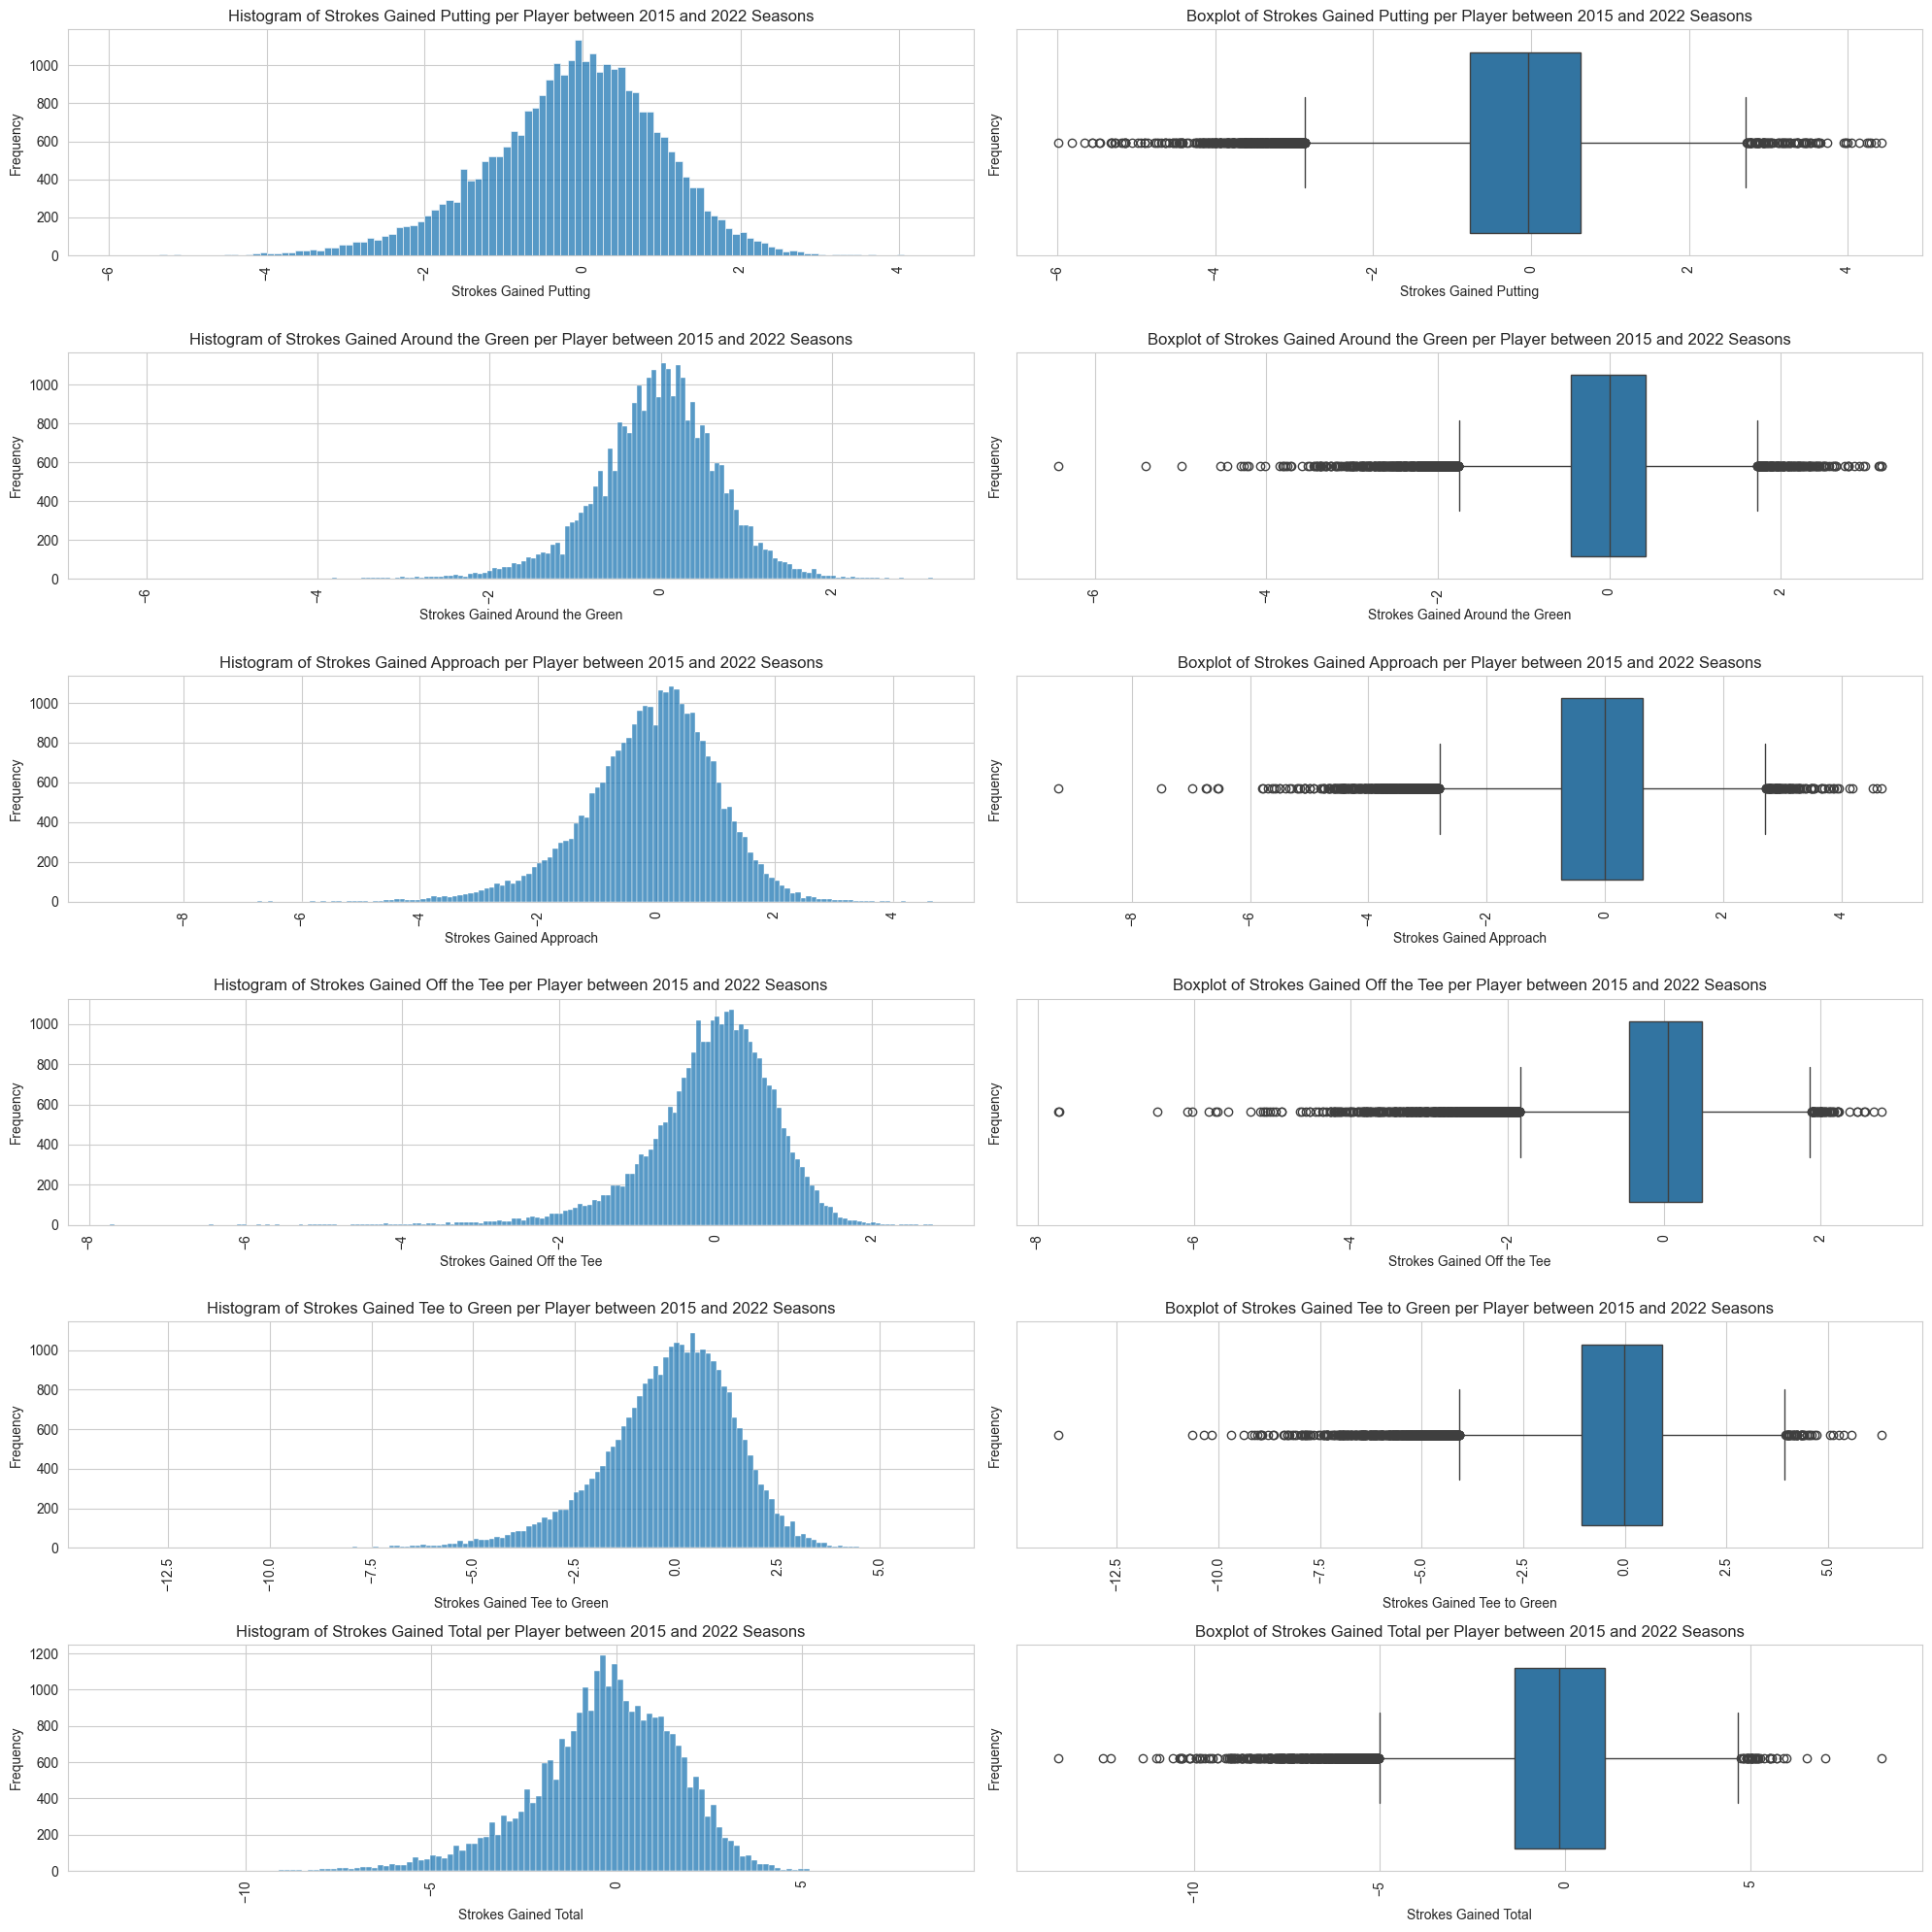

In [10]:
"""
Create histograms and boxplots for the strokes-gained variables including sg_putt, sg_arg, sg_app, sg_ott, sg_t2g, and
sg_total
"""

fig, axs = plt.subplots(6, 2, figsize=(20, 20))

# Supress the warning messages
warnings.filterwarnings('ignore')

# Create the histogram for the `sg_putt` variable
sns.histplot(ax=axs[0, 0], x='sg_putt', data=sg_data)
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)
axs[0, 0].set_title('Histogram of Strokes Gained Putting per Player between 2015 and 2022 Seasons')
axs[0, 0].set_xlabel('Strokes Gained Putting')
axs[0, 0].set_ylabel('Frequency')

# Create the boxplot for the `sg_putt` variable
sns.boxplot(ax=axs[0, 1], x='sg_putt', data=sg_data)
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)
axs[0, 1].set_title('Boxplot of Strokes Gained Putting per Player between 2015 and 2022 Seasons')
axs[0, 1].set_xlabel('Strokes Gained Putting')
axs[0, 1].set_ylabel('Frequency')

# Create the histogram for the `sg_arg` variable
sns.histplot(ax=axs[1, 0], x='sg_arg', data=sg_data)
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=90)
axs[1, 0].set_title('Histogram of Strokes Gained Around the Green per Player between 2015 and 2022 Seasons')
axs[1, 0].set_xlabel('Strokes Gained Around the Green')
axs[1, 0].set_ylabel('Frequency')

# Create the boxplot for the `sg_arg` variable
sns.boxplot(ax=axs[1, 1], x='sg_arg', data=sg_data)
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)
axs[1, 1].set_title('Boxplot of Strokes Gained Around the Green per Player between 2015 and 2022 Seasons')
axs[1, 1].set_xlabel('Strokes Gained Around the Green')
axs[1, 1].set_ylabel('Frequency')

# Create the histogram for the `sg_app` variable
sns.histplot(ax=axs[2, 0], x='sg_app', data=sg_data)
axs[2, 0].set_xticklabels(axs[2, 0].get_xticklabels(), rotation=90)
axs[2, 0].set_title('Histogram of Strokes Gained Approach per Player between 2015 and 2022 Seasons')
axs[2, 0].set_xlabel('Strokes Gained Approach')
axs[2, 0].set_ylabel('Frequency')

# Create the boxplot for the `sg_app` variable
sns.boxplot(ax=axs[2, 1], x='sg_app', data=sg_data)
axs[2, 1].set_xticklabels(axs[2, 1].get_xticklabels(), rotation=90)
axs[2, 1].set_title('Boxplot of Strokes Gained Approach per Player between 2015 and 2022 Seasons')
axs[2, 1].set_xlabel('Strokes Gained Approach')
axs[2, 1].set_ylabel('Frequency')

# Create the histogram for the `sg_ott` variable
sns.histplot(ax=axs[3, 0], x='sg_ott', data=sg_data)
axs[3, 0].set_xticklabels(axs[3, 0].get_xticklabels(), rotation=90)
axs[3, 0].set_title('Histogram of Strokes Gained Off the Tee per Player between 2015 and 2022 Seasons')
axs[3, 0].set_xlabel('Strokes Gained Off the Tee')
axs[3, 0].set_ylabel('Frequency')

# Create the boxplot for the `sg_ott` variable
sns.boxplot(ax=axs[3, 1], x='sg_ott', data=sg_data)
axs[3, 1].set_xticklabels(axs[3, 1].get_xticklabels(), rotation=90)
axs[3, 1].set_title('Boxplot of Strokes Gained Off the Tee per Player between 2015 and 2022 Seasons')
axs[3, 1].set_xlabel('Strokes Gained Off the Tee')
axs[3, 1].set_ylabel('Frequency')

# Create the histogram for the `sg_t2g` variable
sns.histplot(ax=axs[4, 0], x='sg_t2g', data=sg_data)
axs[4, 0].set_xticklabels(axs[4, 0].get_xticklabels(), rotation=90)
axs[4, 0].set_title('Histogram of Strokes Gained Tee to Green per Player between 2015 and 2022 Seasons')
axs[4, 0].set_xlabel('Strokes Gained Tee to Green')
axs[4, 0].set_ylabel('Frequency')

# Create the boxplot for the `sg_t2g` variable
sns.boxplot(ax=axs[4, 1], x='sg_t2g', data=sg_data)
axs[4, 1].set_xticklabels(axs[4, 1].get_xticklabels(), rotation=90)
axs[4, 1].set_title('Boxplot of Strokes Gained Tee to Green per Player between 2015 and 2022 Seasons')
axs[4, 1].set_xlabel('Strokes Gained Tee to Green')
axs[4, 1].set_ylabel('Frequency')

# Create the histogram for the `sg_total` variable
sns.histplot(ax=axs[5, 0], x='sg_total', data=sg_data)
axs[5, 0].set_xticklabels(axs[5, 0].get_xticklabels(), rotation=90)
axs[5, 0].set_title('Histogram of Strokes Gained Total per Player between 2015 and 2022 Seasons')
axs[5, 0].set_xlabel('Strokes Gained Total')
axs[5, 0].set_ylabel('Frequency')

# Create the boxplot for the `sg_total` variable
sns.boxplot(ax=axs[5, 1], x='sg_total', data=sg_data)
axs[5, 1].set_xticklabels(axs[5, 1].get_xticklabels(), rotation=90)
axs[5, 1].set_title('Boxplot of Strokes Gained Total per Player between 2015 and 2022 Seasons')
axs[5, 1].set_xlabel('Strokes Gained Total')
axs[5, 1].set_ylabel('Frequency')

plt.tight_layout()

## <font color = 'green'><u>Step 3. Bivariate Analysis</u></font>

### 3.1 Correlation Matrix
Use a correlation matrix to understand the relationships between the numerical variables.

#### <u>3.1.1 Correlation Matrix for non-Strokes-Gained Data</u>
**Numerical variables to include for non-strokes-gained data:**
- pos
- hole_par
- strokes
- n_rounds
- course_experience

In [11]:
"""
Correlation matrix for non-strokes-gained data
"""

# Define the numerical variables to include in the correlation matrix
nsg_num_variables = ['pos', 'hole_par', 'strokes', 'course_experience']

# Create the correlation matrix
corr_matrix = pga_clean_valid[nsg_num_variables].corr()
corr_matrix

'\nCorrelation matrix for non-strokes-gained data\n'

,pos,hole_par,strokes,course_experience
pos,1.000000,-0.155555,0.088869,-0.062336
hole_par,-0.155555,1.000000,0.933329,0.052083
strokes,0.088869,0.933329,1.000000,0.020319
course_experience,-0.062336,0.052083,0.020319,1.000000


#### <u>3.1.2 Heatmapping of Correlation Matrix for non-Strokes-Gained Data</u>

'\nHeatmap of the correlation matrix for non-strokes-gained dataset\n'

<Figure size 800x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Heatmap of the Correlation Matrix for Non-Strokes-Gained Dataset')

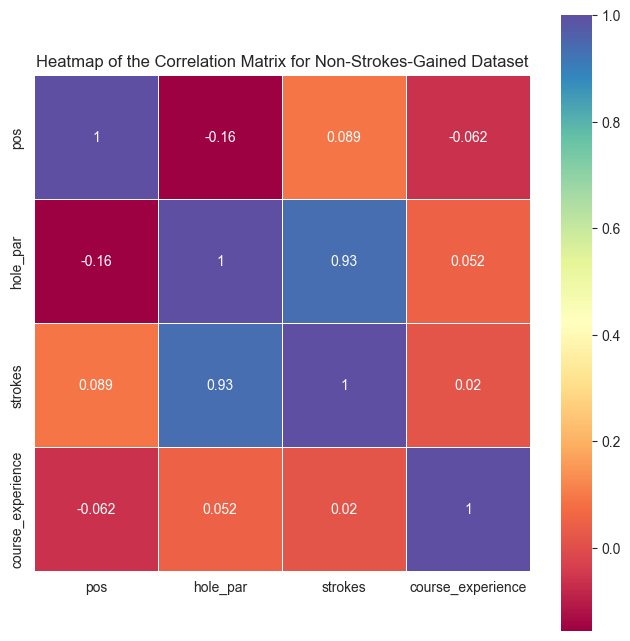

In [12]:
"""
Heatmap of the correlation matrix for non-strokes-gained dataset
"""

# Create the heatmap of the correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, vmax=1, square=True, annot=True, cmap='Spectral', linewidths=0.5)
plt.title('Heatmap of the Correlation Matrix for Non-Strokes-Gained Dataset')
plt.show()

#### <u>3.1.3 Correlation Matrix for Strokes-Gained Data</u>
**Numerical variables to include for strokes-gained data:**
- pos
- hole_par
- strokes
- n_rounds
- course_experience
- sg_putt
- sg_arg
- sg_app
- sg_ott
- sg_t2g
- sg_total

In [13]:
"""
Correlation matrix for strokes-gained data

Numerical variables to include in the correlation matrix
    - pos
    - course_experience
    - sg_putt
    - sg_arg
    - sg_app
    - sg_ott
    - sg_t2g
    - sg_total
"""

# Define the numerical variables to include in the strokes-gained data correlation matrix
sg_num_variables = ['pos', 'course_experience', 'sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total']

# Create the correlation matrix
sg_corr_matrix = sg_data_valid[sg_num_variables].corr()
sg_corr_matrix


'\nCorrelation matrix for strokes-gained data\n\nNumerical variables to include in the correlation matrix\n    - pos\n    - course_experience\n    - sg_putt\n    - sg_arg\n    - sg_app\n    - sg_ott\n    - sg_t2g\n    - sg_total\n'

,pos,course_experience,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
pos,1.000000,-0.067987,-0.433063,-0.291397,-0.475535,-0.364755,-0.667947,-0.861753
course_experience,-0.067987,1.000000,0.025525,0.057803,0.041435,-0.002442,0.056007,0.069021
sg_putt,-0.433063,0.025525,1.000000,-0.036183,-0.121518,-0.089783,-0.150700,0.499557
sg_arg,-0.291397,0.057803,-0.036183,1.000000,-0.042821,-0.063883,0.412268,0.335472
sg_app,-0.475535,0.041435,-0.121518,-0.042821,1.000000,0.072100,0.735024,0.562536
sg_ott,-0.364755,-0.002442,-0.089783,-0.063883,0.072100,1.000000,0.535976,0.411594
sg_t2g,-0.667947,0.056007,-0.150700,0.412268,0.735024,0.535976,1.000000,0.775542
sg_total,-0.861753,0.069021,0.499557,0.335472,0.562536,0.411594,0.775542,1.000000


#### <u>3.1.4 Heatmapping of Correlation Matrix for Strokes-Gained Data</u>

'\nHeatmap of the correlation matrix for strokes-gained dataset\n'

<Figure size 800x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Heatmap of the Correlation Matrix for Strokes-Gained Dataset')

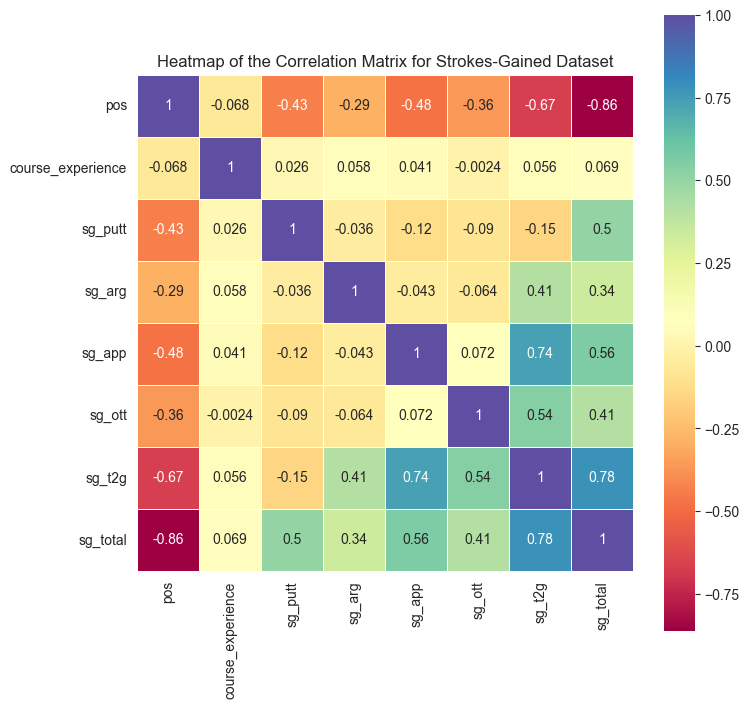

In [14]:
"""
Heatmap of the correlation matrix for strokes-gained dataset
"""

# Create the heatmap of the correlation matrix with the 'Greens' color map palette
plt.figure(figsize=(8, 8))
sns.heatmap(sg_corr_matrix, vmax=1, square=True, annot=True, cmap='Spectral', linewidths=0.5)
plt.title('Heatmap of the Correlation Matrix for Strokes-Gained Dataset')
plt.show()

### 3.2 Scatter Plots
Use scattler plots for visualizing relationships between pairs of numerical variables.

#### <u>3.2.1 Scatterplot of Non-Strokes-Gained Data</u>

'\nCreate scatter/KDE plots for the numerical variables in the non-strokes-gained data.\n\nIn the upper right corner of the scatterplot, the Pearson correlation coefficient is displayed.\n\nAdditionally, the upper-righthand portion of the scatterplot will be a kernel density estimate (KDE) plot of the\ndistribution of the two variables plotted to more easily visualize the distribution and density of the data points.\n\nNumerical variables to include in the scatterplots previously defined non-strokes-gained variables:\n    - pos\n    - hole_par\n    - strokes\n    - course_experience \n'

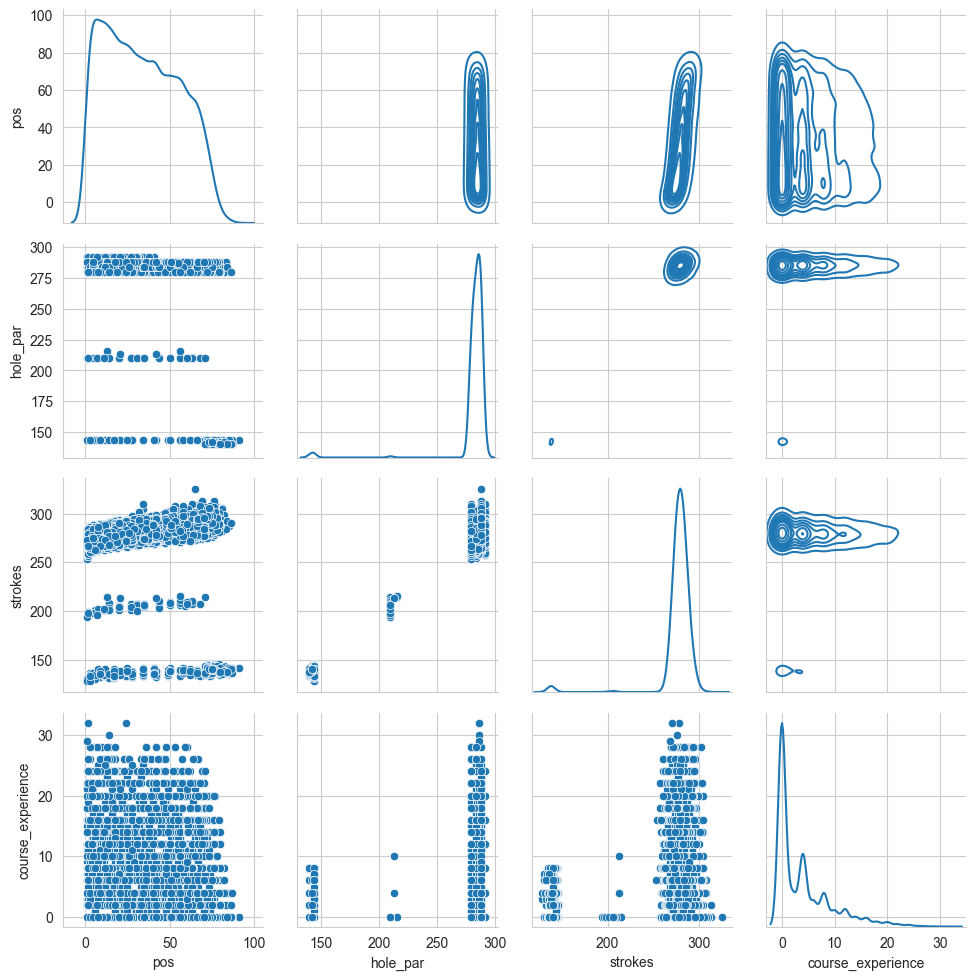

In [15]:
"""
Create scatter/KDE plots for the numerical variables in the non-strokes-gained data.

In the upper right corner of the scatterplot, the Pearson correlation coefficient is displayed.

Additionally, the upper-righthand portion of the scatterplot will be a kernel density estimate (KDE) plot of the
distribution of the two variables plotted to more easily visualize the distribution and density of the data points.

Numerical variables to include in the scatterplots previously defined non-strokes-gained variables:
    - pos
    - hole_par
    - strokes
    - course_experience 
"""

# Create scatter/KDE plots entitled `nsg_pairplot`
nsg_pairplot = sns.PairGrid(pga_clean_valid, vars=nsg_num_variables, diag_sharey=False)
nsg_pairplot.map_upper(sns.kdeplot) # KDE plot of the distribution of the two variables plotted
nsg_pairplot.map_lower(sns.scatterplot) # Scatterplot of the two variables plotted
nsg_pairplot.map_diag(sns.kdeplot) # KDE plot of the distribution of the variable plotted


#### <u>3.2.2 Scatter/KDE Plots of Strokes-Gained Data</u>

'\nCreate scatter/KDE plots for the numerical variables in the strokes-gained data\n\nNumerical variables to include in the scatterplots:\n    - pos\n    - course_experience\n    - sg_putt\n    - sg_arg\n    - sg_app\n    - sg_ott\n    - sg_t2g\n    - sg_total\n'

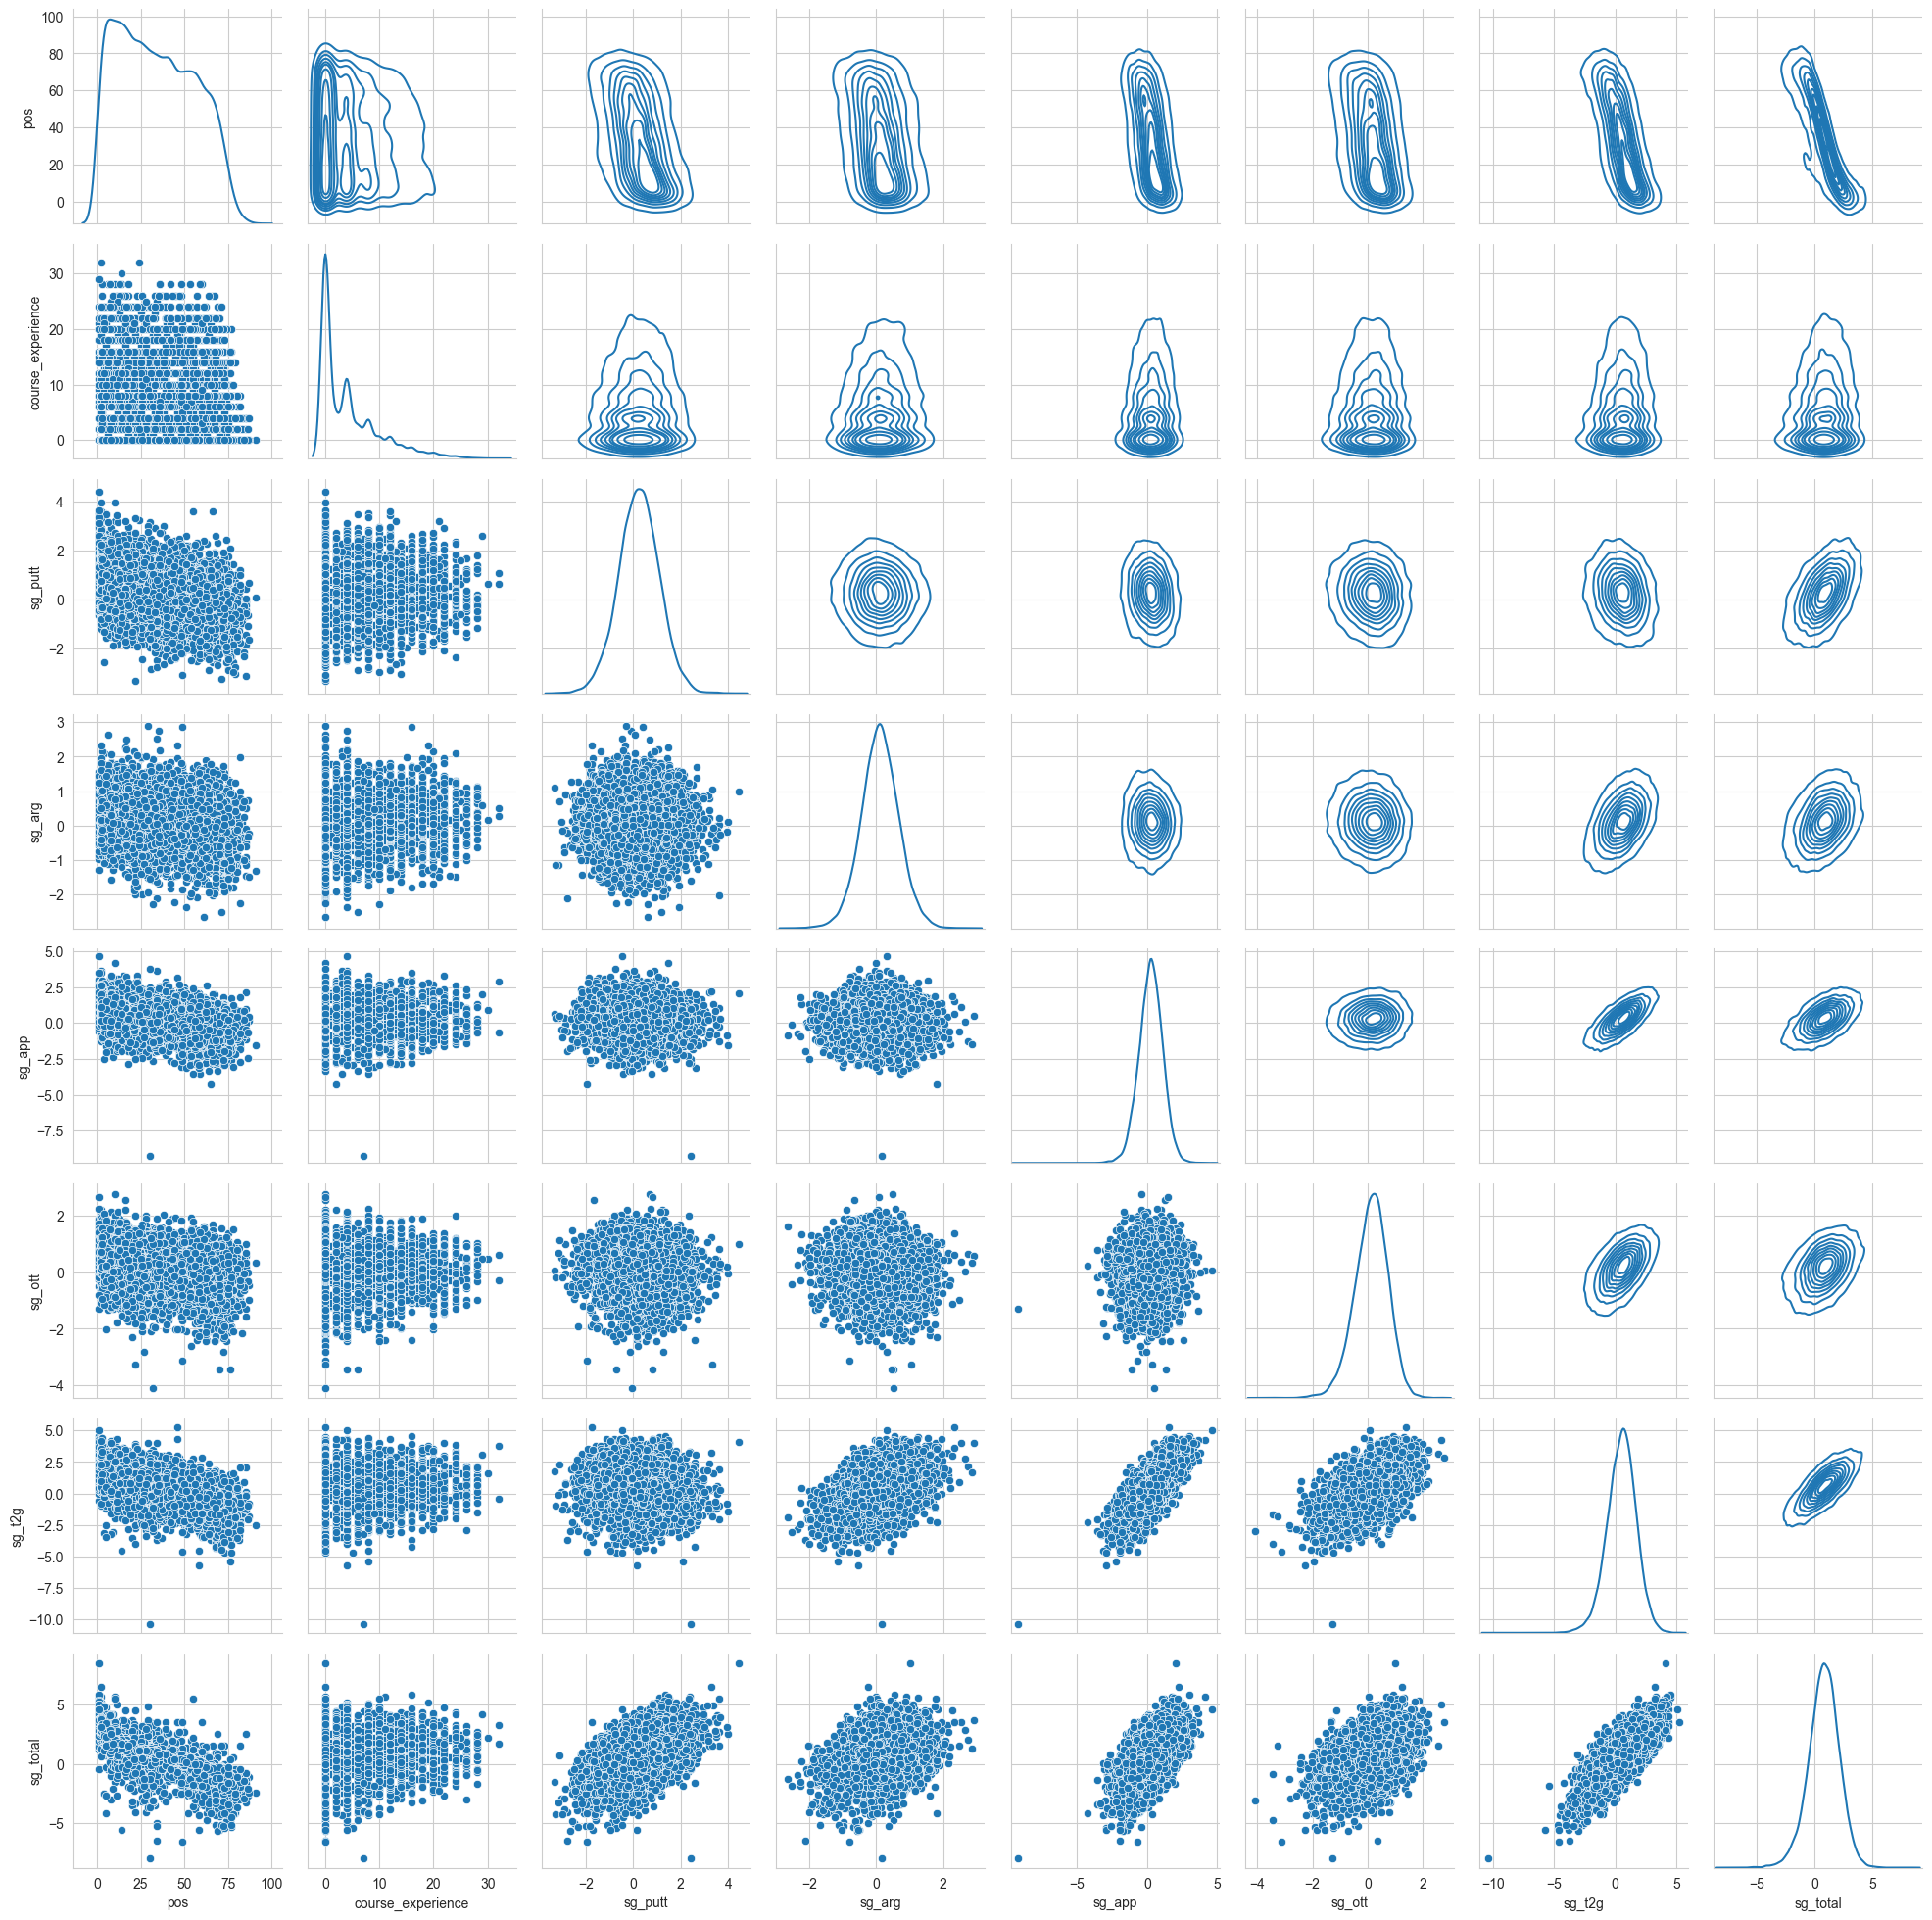

In [16]:
"""
Create scatter/KDE plots for the numerical variables in the strokes-gained data

Numerical variables to include in the scatterplots:
    - pos
    - course_experience
    - sg_putt
    - sg_arg
    - sg_app
    - sg_ott
    - sg_t2g
    - sg_total
"""

# Create the scatter/KDE plots from the previously defined strokes-gained numerical variables
sg_pairplot = sns.PairGrid(sg_data_valid, vars=sg_num_variables, diag_sharey=False)
sg_pairplot.map_upper(sns.kdeplot) # KDE plot of the distribution of the two variables plotted
sg_pairplot.map_lower(sns.scatterplot) # Scatterplot of the two variables plotted
sg_pairplot.map_diag(sns.kdeplot) # KDE plot of the distribution of the variable plotted
